# In this notebook, We are focusing more on actual detailed analysis in SV flanks

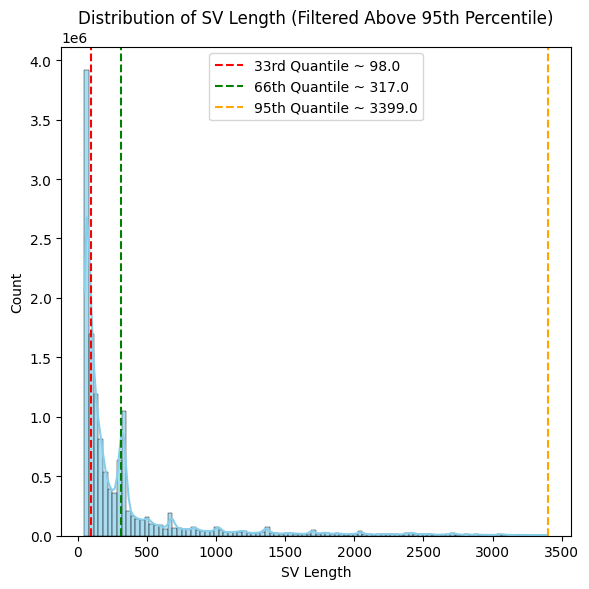

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#----------------------------------------------------------------------
# 1) Load the CSV
#----------------------------------------------------------------------
csv_path = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv"
df = pd.read_csv(csv_path)

#----------------------------------------------------------------------
# 2) Extract SV_Length from 'Sample_Haplotype_Chromosome', if needed
#----------------------------------------------------------------------
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')

# Drop rows with missing SV_Length
df.dropna(subset=['SV_Length'], inplace=True)

#----------------------------------------------------------------------
# 3) (Optional) Filter to one haplotype or pattern
#    Uncomment if you only want one haplotype:
#----------------------------------------------------------------------
# df = df[df['Sample_Haplotype_Chromosome'].str.contains("HG00513_hap1", na=False)].copy()

#----------------------------------------------------------------------
# 4) Identify quantiles for Short, Medium, Long
#    e.g., 0.33 (33rd pct) and 0.66 (66th pct)
#----------------------------------------------------------------------
q1 = df['SV_Length'].quantile(0.33)
q2 = df['SV_Length'].quantile(0.66)

#----------------------------------------------------------------------
# 5) Remove super large outliers above a certain high quantile
#    e.g., remove everything above the 95th percentile
#----------------------------------------------------------------------
q_upper = df['SV_Length'].quantile(0.95)  # or 0.99, etc.
df_filtered = df[df['SV_Length'] <= q_upper].copy()

#----------------------------------------------------------------------
# 6) Plot the distribution (histogram + KDE) of the filtered data
#    and mark where those quantiles lie.
#----------------------------------------------------------------------
plt.figure(figsize=(6, 6))
sns.histplot(df_filtered['SV_Length'], bins=100, kde=True, color='skyblue', alpha=0.7)

# Add vertical lines for q1, q2, and the upper cutoff
plt.axvline(q1, color='red', linestyle='--', label=f'33rd Quantile ~ {q1:.1f}')
plt.axvline(q2, color='green', linestyle='--', label=f'66th Quantile ~ {q2:.1f}')
plt.axvline(q_upper, color='orange', linestyle='--', label=f'95th Quantile ~ {q_upper:.1f}')

plt.title("Distribution of SV Length (Filtered Above 95th Percentile)")
plt.xlabel("SV Length")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

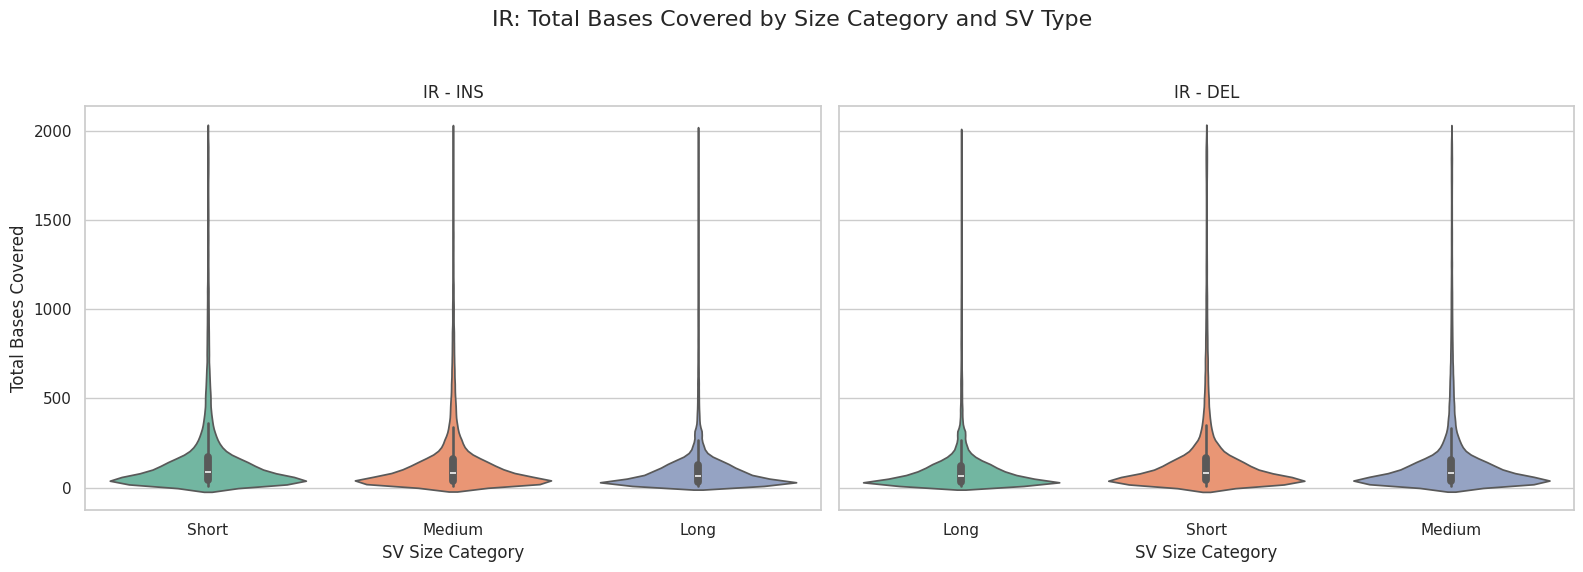

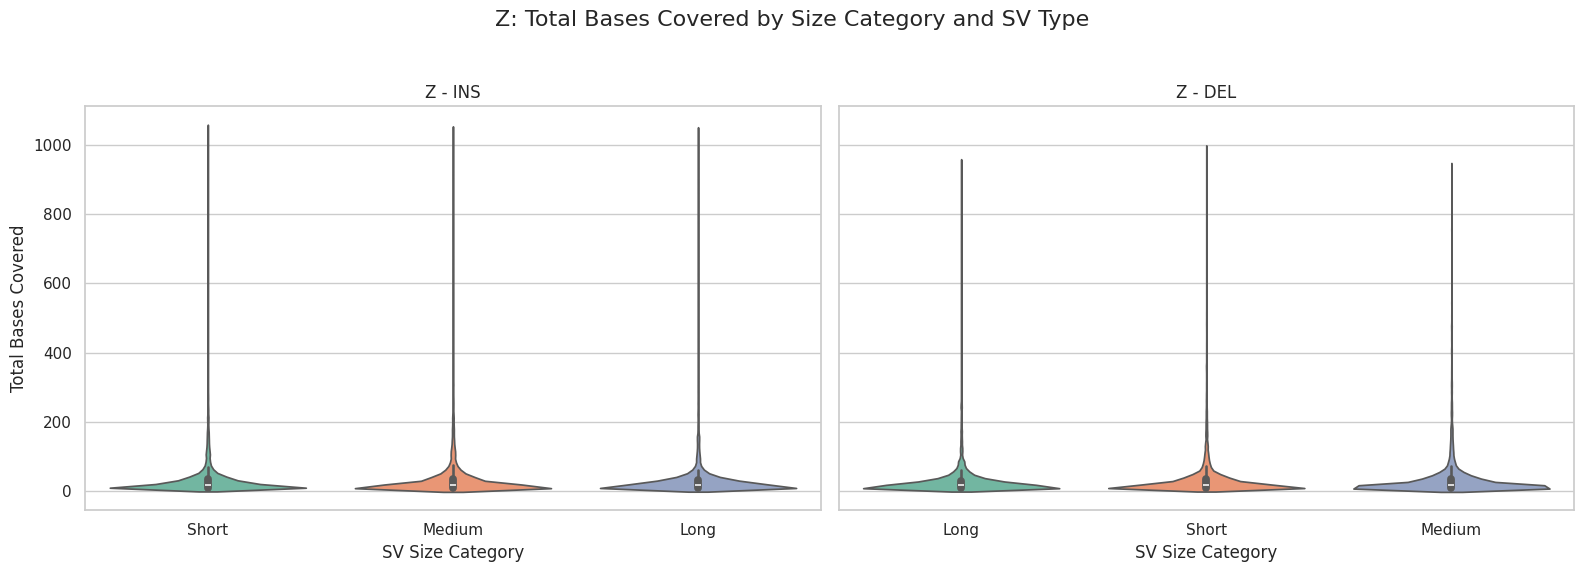

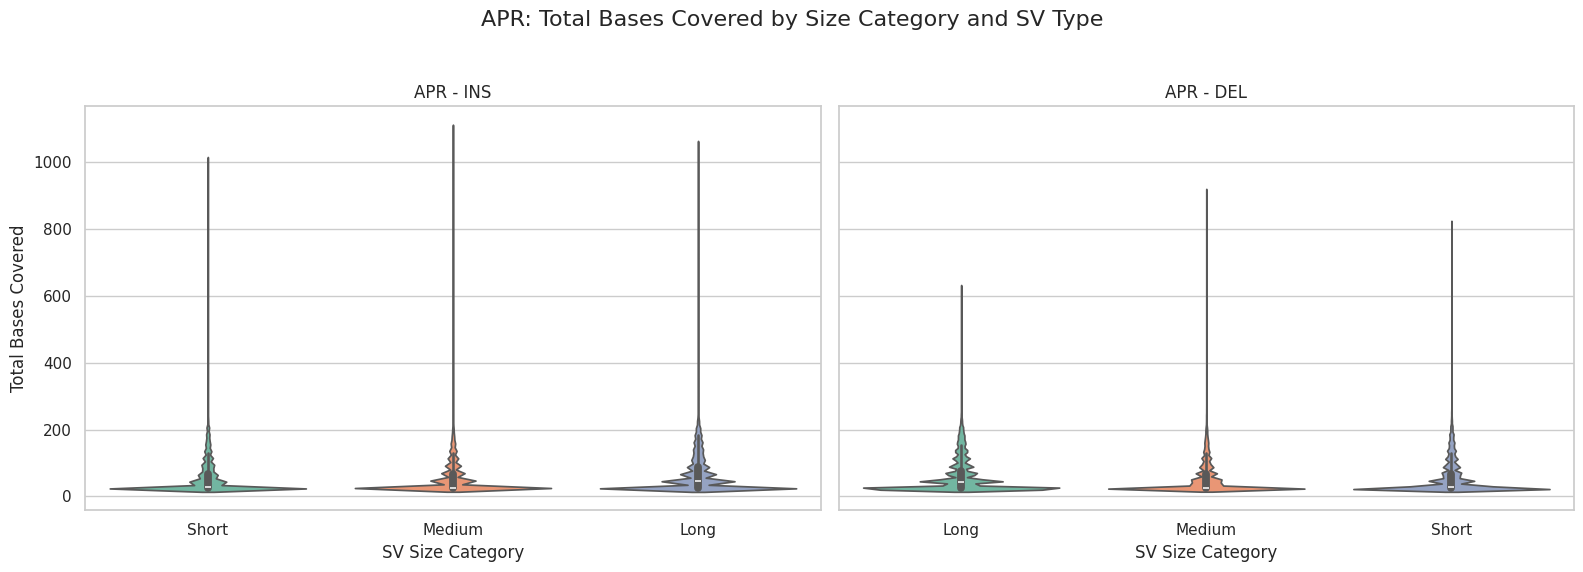

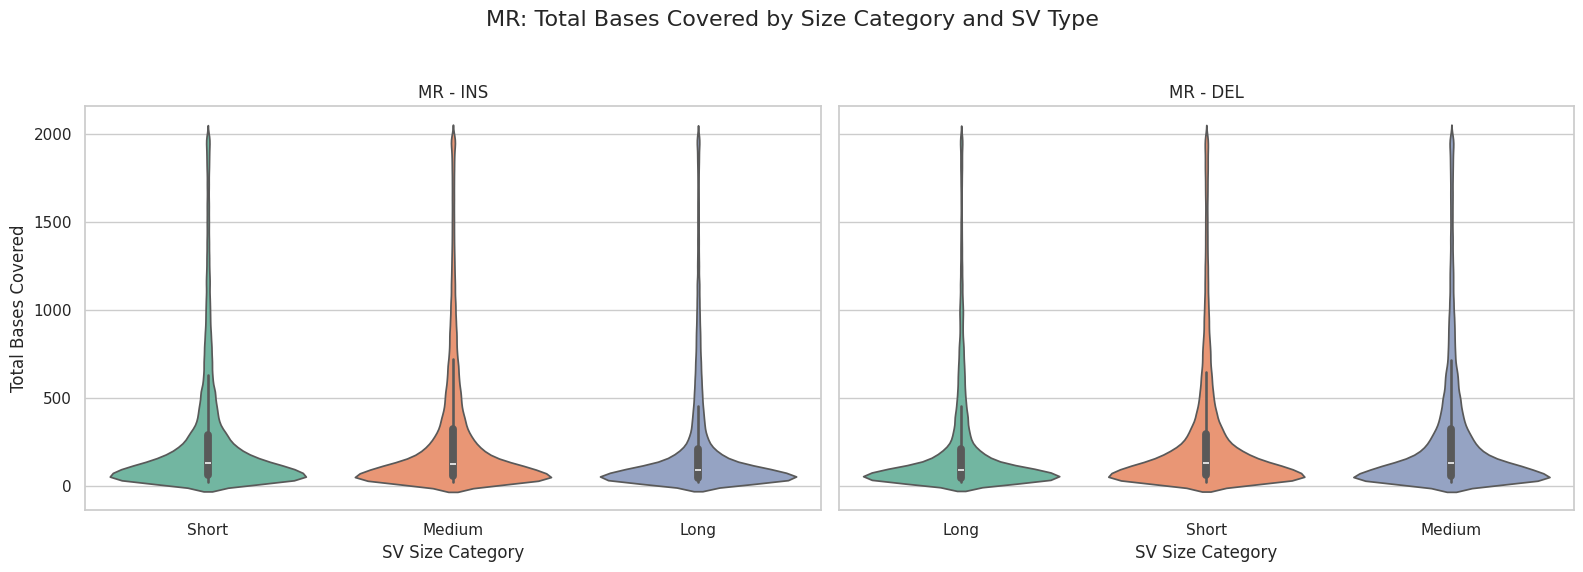

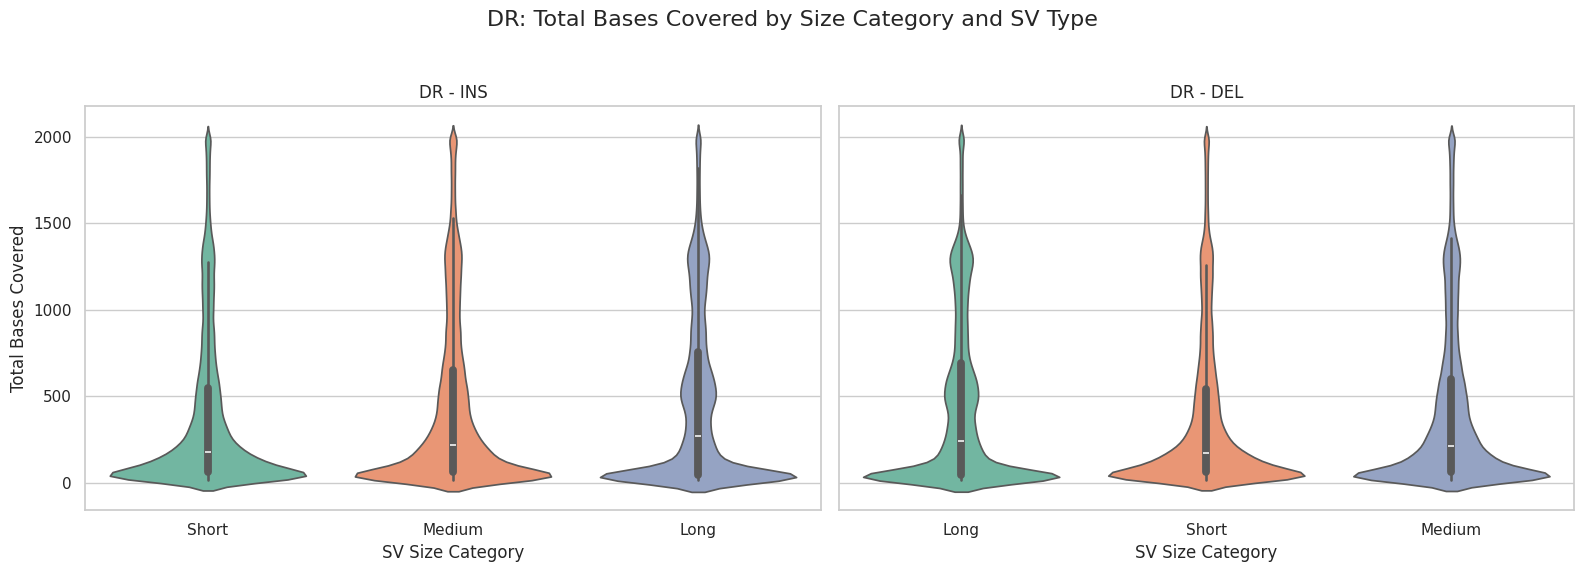

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#----------------------------------------------------------------------
# 1) Load the CSV
#----------------------------------------------------------------------
csv_path = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv"  # Replace with actual file path
df = pd.read_csv(csv_path)

#----------------------------------------------------------------------
# 2) Extract SV_Length and SV_Type from 'Sample_Haplotype_Chromosome'
#----------------------------------------------------------------------
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Drop rows with missing SV_Length
df.dropna(subset=['SV_Length'], inplace=True)

#----------------------------------------------------------------------
# 3) Identify quantiles for Short, Medium, Long (NO Outlier Removal)
#----------------------------------------------------------------------
q1 = df['SV_Length'].quantile(0.33)
q2 = df['SV_Length'].quantile(0.66)

# Define size categories
def categorize_size(length):
    if length <= q1:
        return "Short"
    elif length <= q2:
        return "Medium"
    else:
        return "Long"

df['Size_Category'] = df['SV_Length'].apply(categorize_size)

#----------------------------------------------------------------------
# 4) Remove Outliers Beyond 95th Quantile
#----------------------------------------------------------------------
# Calculate the 95th percentile for 'Total Bases Covered'
#threshold = df['Total Bases Covered'].quantile(0.95)
#df = df[df['Total Bases Covered'] <= threshold]

#----------------------------------------------------------------------
# 5) Create Boxplots for EACH Motif Type (INS and DEL Side by Side)
#----------------------------------------------------------------------

# Get unique motif types
motif_types = df['Motif Type'].unique()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Iterate over each motif type
for motif in motif_types:
    # Filter data for the current motif
    motif_df = df[df['Motif Type'] == motif]
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # Define SV Types
    sv_types = ["INS", "DEL"]
    
    for ax, sv_type in zip(axes, sv_types):
        # Filter data for the current SV Type
        subset = motif_df[motif_df['SV_Type'] == sv_type]
        
        # Create boxplot with hue assigned to 'Size_Category' to avoid FutureWarning
        sns.violinplot(
            x="Size_Category",
            y="Total Bases Covered",
            hue="Size_Category",  # Assign hue to fix the FutureWarning
            data=subset,
            palette="Set2",
            ax=ax,
            dodge=False  # Ensures categories are aligned properly
        )
        
        # Set titles and labels
        ax.set_title(f"{motif} - {sv_type}")
        ax.set_xlabel("SV Size Category")
        ax.set_ylabel("Total Bases Covered" if sv_type == "INS" else "")
    
    # Adjust layout and add a main title
    plt.suptitle(f"{motif}: Total Bases Covered by Size Category and SV Type", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Display the plot
    plt.show()


IR - KS 2-Sample Tests:
Short vs Medium: KS=0.0249, p=0.0000
Medium vs Long: KS=0.0841, p=0.0000
Short vs Long: KS=0.1073, p=0.0000


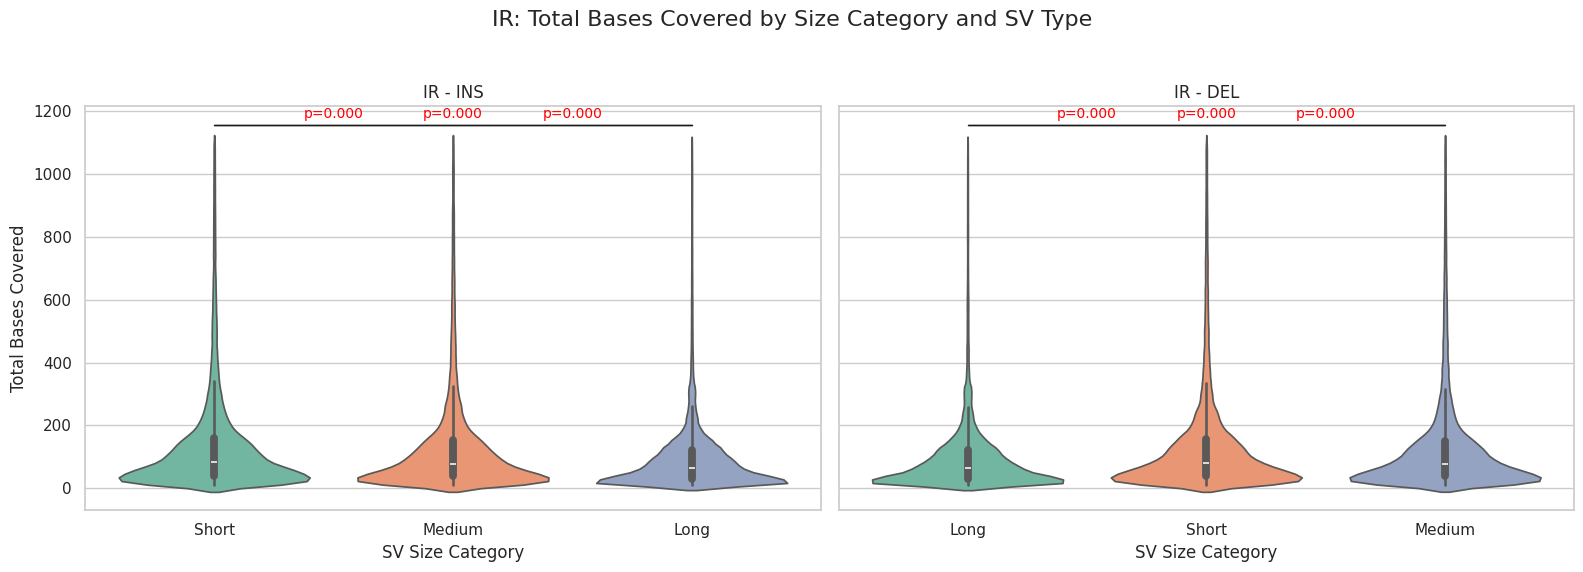


Z - KS 2-Sample Tests:
Short vs Medium: KS=0.0138, p=0.0000
Medium vs Long: KS=0.0458, p=0.0000
Short vs Long: KS=0.0428, p=0.0000


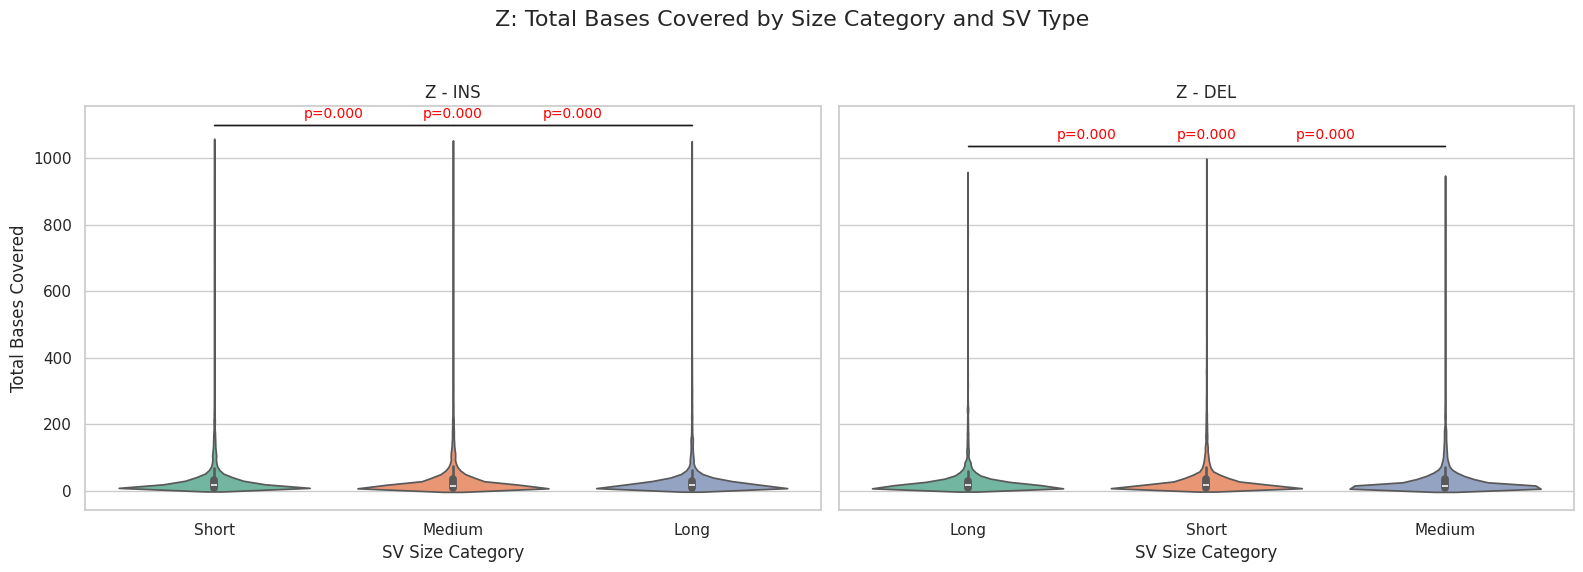


APR - KS 2-Sample Tests:
Short vs Medium: KS=0.0220, p=0.0000
Medium vs Long: KS=0.1130, p=0.0000
Short vs Long: KS=0.1037, p=0.0000


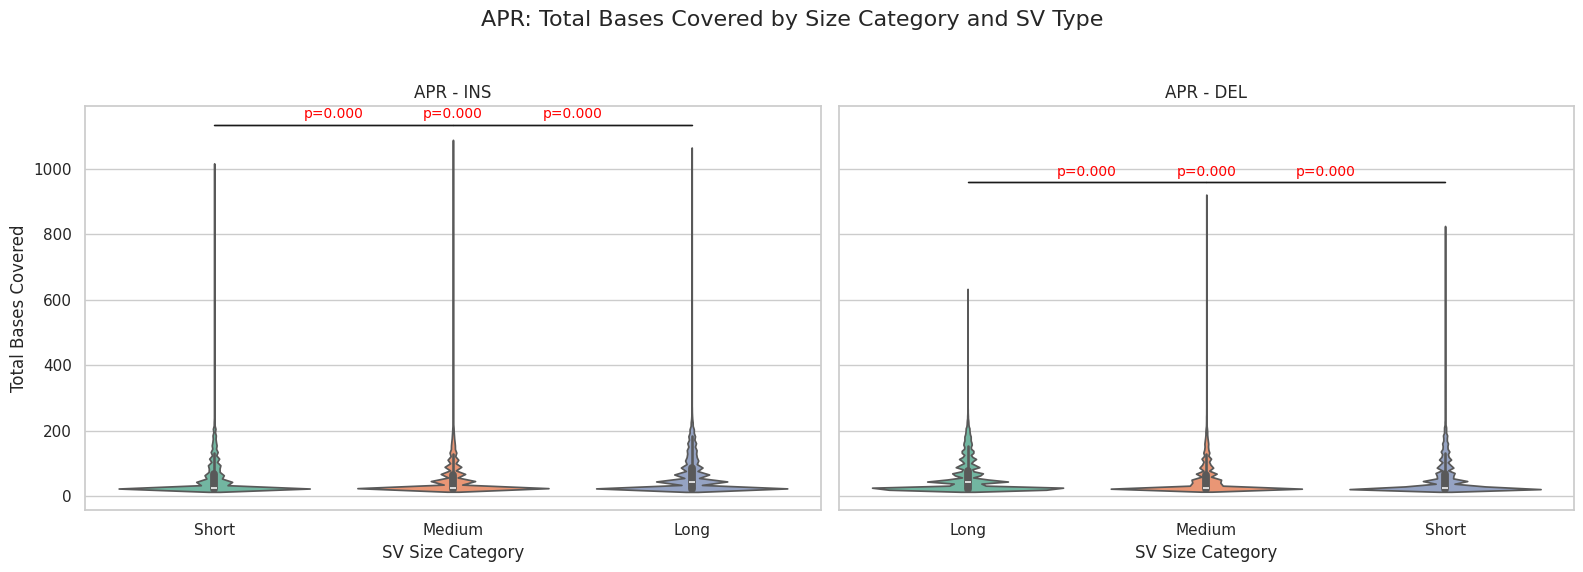


MR - KS 2-Sample Tests:
Short vs Medium: KS=0.0212, p=0.0000
Medium vs Long: KS=0.1267, p=0.0000
Short vs Long: KS=0.1343, p=0.0000


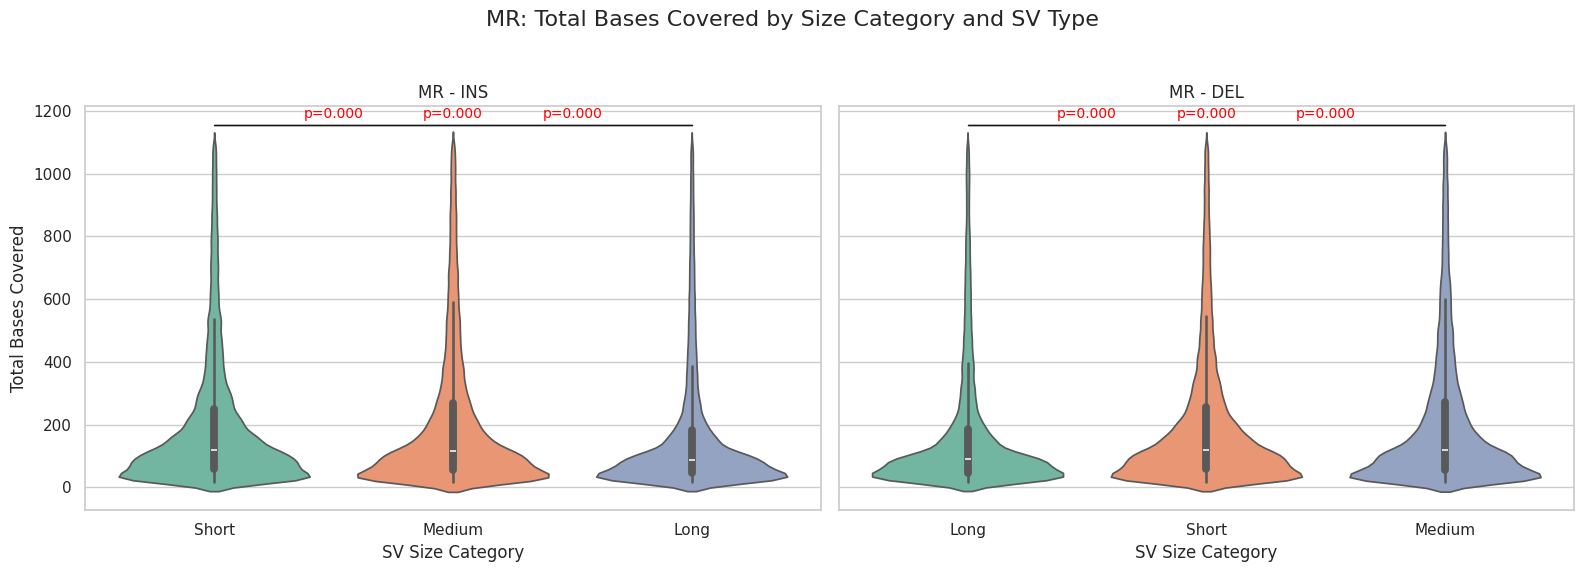


DR - KS 2-Sample Tests:
Short vs Medium: KS=0.0437, p=0.0000
Medium vs Long: KS=0.0763, p=0.0000
Short vs Long: KS=0.0888, p=0.0000


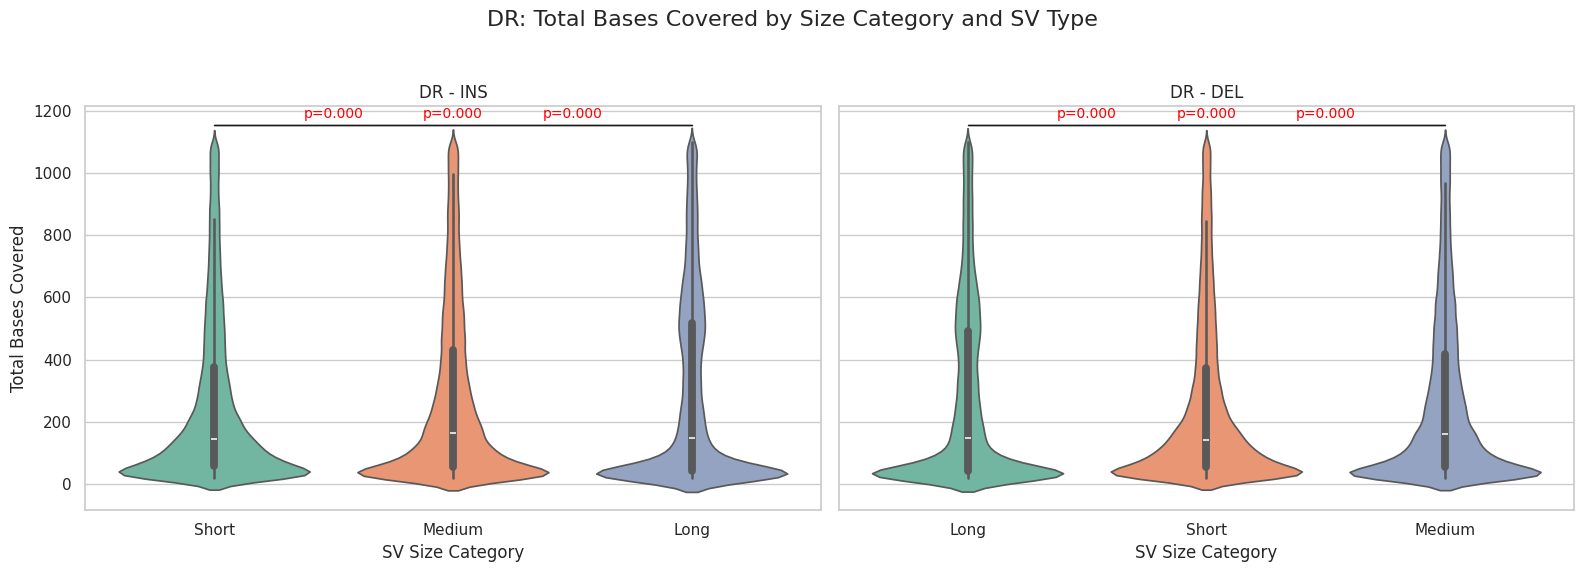

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

#----------------------------------------------------------------------
# 1) Load the CSV
#----------------------------------------------------------------------
csv_path = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv"  # Replace with actual file path
df = pd.read_csv(csv_path)

#----------------------------------------------------------------------
# 2) Extract SV_Length and SV_Type from 'Sample_Haplotype_Chromosome'
#----------------------------------------------------------------------
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Drop rows with missing SV_Length
df.dropna(subset=['SV_Length'], inplace=True)

#----------------------------------------------------------------------
# 3) Identify quantiles for Short, Medium, Long (NO Outlier Removal)
#----------------------------------------------------------------------
q1 = df['SV_Length'].quantile(0.33)
q2 = df['SV_Length'].quantile(0.66)

# Define size categories
def categorize_size(length):
    if length <= q1:
        return "Short"
    elif length <= q2:
        return "Medium"
    else:
        return "Long"

df['Size_Category'] = df['SV_Length'].apply(categorize_size)

#----------------------------------------------------------------------
# 4) Remove Outliers Beyond 95th Quantile
#----------------------------------------------------------------------
# Calculate the 95th percentile for 'Total Bases Covered'
threshold = df['Total Bases Covered'].quantile(0.95)
df = df[df['Total Bases Covered'] <= threshold]

#----------------------------------------------------------------------
# 5) Perform KS 2-Sample Tests
#----------------------------------------------------------------------

def ks_tests(data, motif):
    """ Perform pairwise KS 2-sample tests and return significant pairs. """
    subset = data[data['Motif Type'] == motif]
    
    pairs = [("Short", "Medium"), ("Medium", "Long"), ("Short", "Long")]
    sig_results = []

    print(f"\n{motif} - KS 2-Sample Tests:")
    
    for cat1, cat2 in pairs:
        group1 = subset[subset['Size_Category'] == cat1]['Total Bases Covered']
        group2 = subset[subset['Size_Category'] == cat2]['Total Bases Covered']
        
        if len(group1) > 0 and len(group2) > 0:  # Ensure non-empty groups
            stat, p_value = ks_2samp(group1, group2)
            print(f"{cat1} vs {cat2}: KS={stat:.4f}, p={p_value:.4f}")
            
        if p_value < 0.05:
                sig_results.append((cat1, cat2, p_value))
        else:
            print(f"Skipping {cat1} vs {cat2} (not enough data)")

    return sig_results

#----------------------------------------------------------------------
# 6) Create Boxplots for EACH Motif Type (INS and DEL Side by Side)
#----------------------------------------------------------------------

# Get unique motif types
motif_types = df['Motif Type'].unique()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Iterate over each motif type
for motif in motif_types:
    # Filter data for the current motif
    motif_df = df[df['Motif Type'] == motif]
    
    # Perform KS tests
    sig_results = ks_tests(df, motif)
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # Define SV Types
    sv_types = ["INS", "DEL"]
    
    for ax, sv_type in zip(axes, sv_types):
        # Filter data for the current SV Type
        subset = motif_df[motif_df['SV_Type'] == sv_type]
        
        # Create boxplot
        sns.violinplot(
            x="Size_Category",
            y="Total Bases Covered",
            hue="Size_Category",
            data=subset,
            palette="Set2",
            ax=ax,
            dodge=False
        )
        
        # Set titles and labels
        ax.set_title(f"{motif} - {sv_type}")
        ax.set_xlabel("SV Size Category")
        ax.set_ylabel("Total Bases Covered" if sv_type == "INS" else "")
        
        # Annotate significant differences (if any)
        if sig_results:
            y_max = subset["Total Bases Covered"].max()
            
            for cat1, cat2, p_val in sig_results:
                x1, x2 = ["Short", "Medium", "Long"].index(cat1), ["Short", "Medium", "Long"].index(cat2)
                ax.plot([x1, x2], [y_max * 1.05, y_max * 1.05], 'k-', lw=1)
                ax.text((x1 + x2) / 2, y_max * 1.07, f"p={p_val:.3f}", ha='center', fontsize=10, color='red')
    
    # Adjust layout and add a main title
    plt.suptitle(f"{motif}: Total Bases Covered by Size Category and SV Type", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Display the plot
    plt.show()

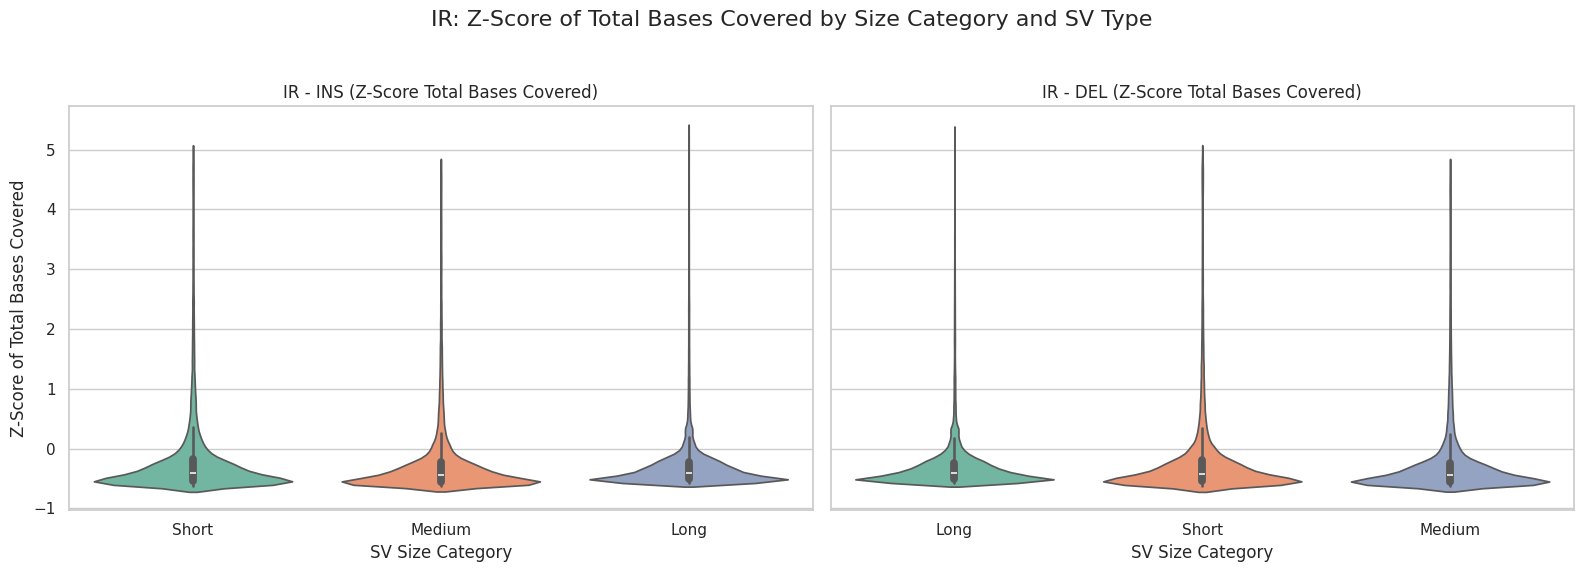

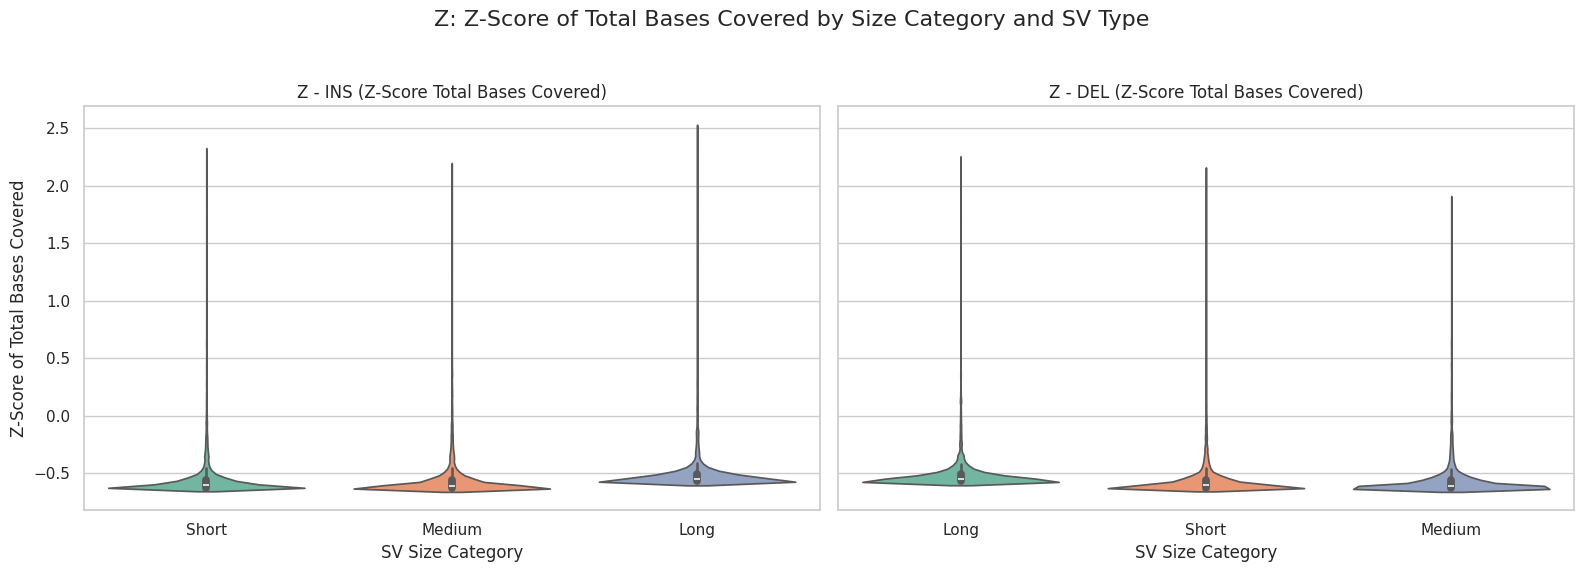

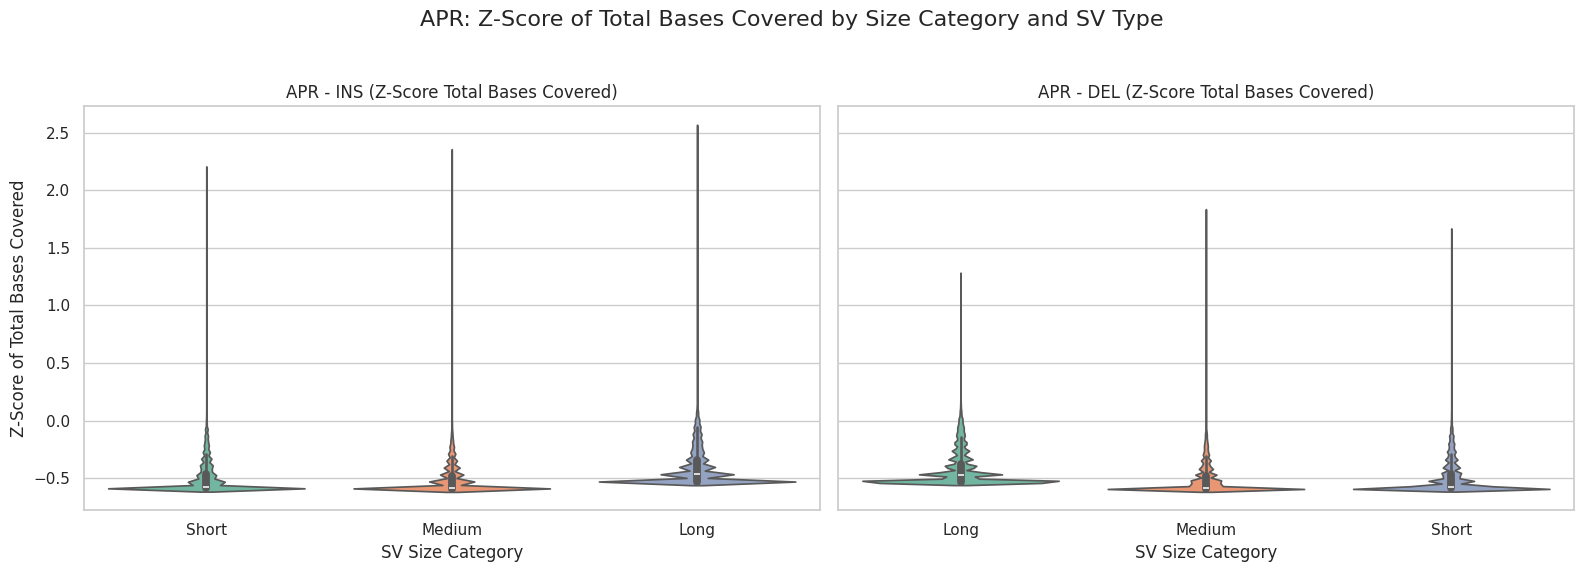

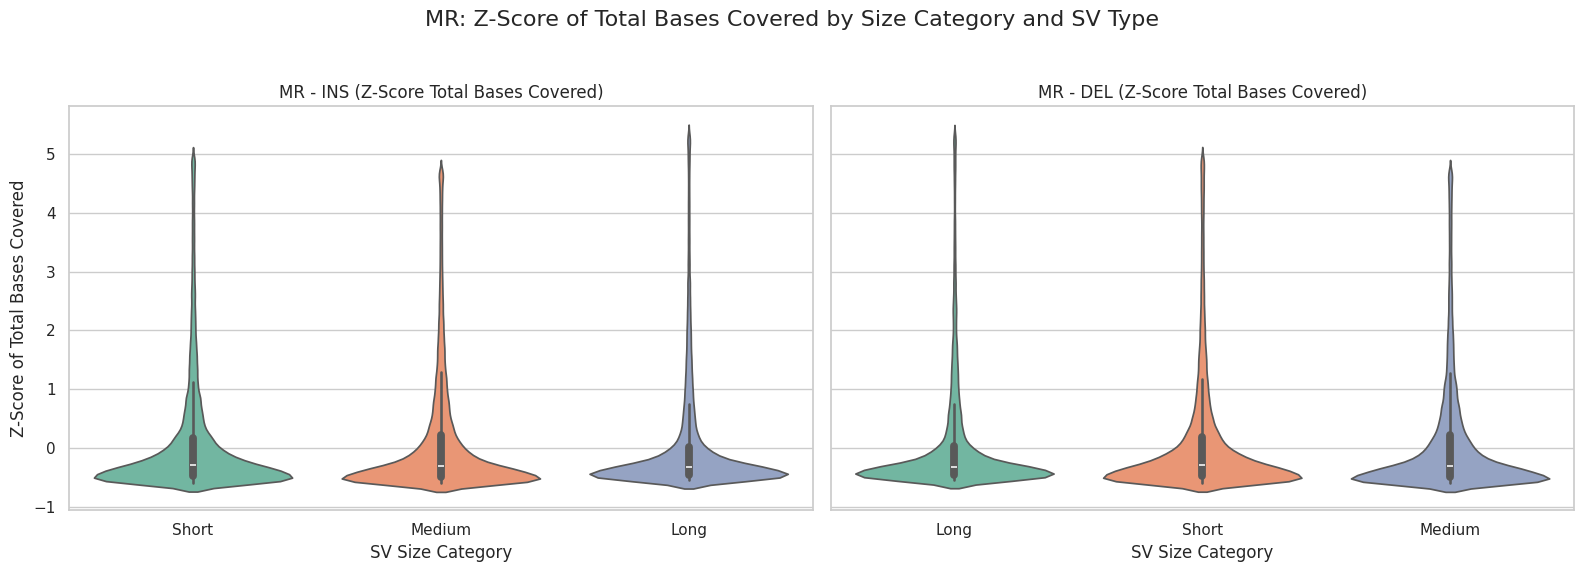

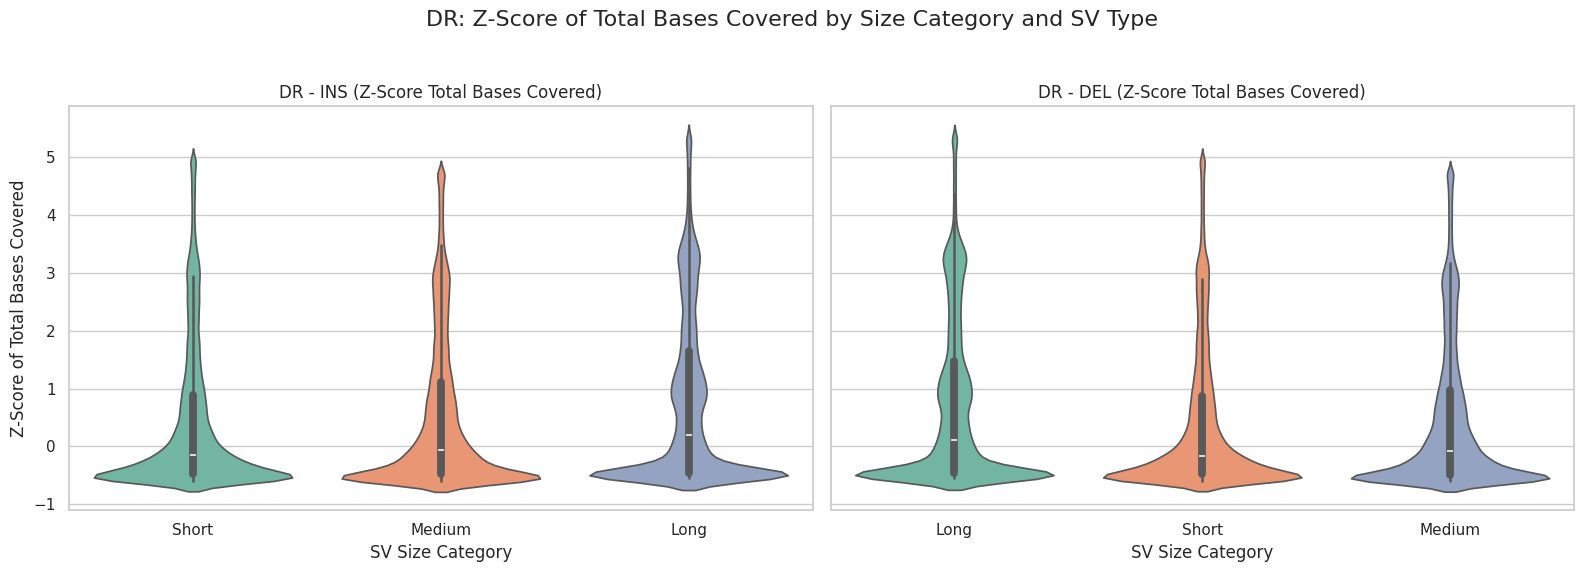

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#----------------------------------------------------------------------
# 1) Load the CSV
#----------------------------------------------------------------------
csv_path = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv"  # Replace with actual file path
df = pd.read_csv(csv_path)

#----------------------------------------------------------------------
# 2) Extract SV_Length and SV_Type from 'Sample_Haplotype_Chromosome'
#----------------------------------------------------------------------
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Drop rows with missing SV_Length
df.dropna(subset=['SV_Length'], inplace=True)

#----------------------------------------------------------------------
# 3) Identify quantiles for Short, Medium, Long (NO Outlier Removal)
#----------------------------------------------------------------------
q1 = df['SV_Length'].quantile(0.33)
q2 = df['SV_Length'].quantile(0.66)

# Define size categories
def categorize_size(length):
    if length <= q1:
        return "Short"
    elif length <= q2:
        return "Medium"
    else:
        return "Long"

df['Size_Category'] = df['SV_Length'].apply(categorize_size)

#----------------------------------------------------------------------
# 4) Compute Z-scores for Total Bases Covered (as proxy for enrichment in Non-B DNA in flanks)
#----------------------------------------------------------------------
df['Z_Score_Total_Bases'] = df.groupby("Size_Category")['Total Bases Covered'].transform(zscore)

#----------------------------------------------------------------------
# 5) Create Boxplots for EACH Motif Type (INS and DEL Side by Side) Using Z-Scores
#----------------------------------------------------------------------

# Get unique motif types
motif_types = df['Motif Type'].unique()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Iterate over each motif type
for motif in motif_types:
    # Filter data for the current motif
    motif_df = df[df['Motif Type'] == motif]
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # Define SV Types
    sv_types = ["INS", "DEL"]
    
    for ax, sv_type in zip(axes, sv_types):
        # Filter data for the current SV Type
        subset = motif_df[motif_df['SV_Type'] == sv_type]
        
        # Create boxplot
        sns.violinplot(
            x="Size_Category",
            y="Z_Score_Total_Bases",
            hue="Size_Category",
            data=subset,
            palette="Set2",
            ax=ax,
            dodge=False
        )
        
        # Set titles and labels
        ax.set_title(f"{motif} - {sv_type} (Z-Score Total Bases Covered)")
        ax.set_xlabel("SV Size Category")
        ax.set_ylabel("Z-Score of Total Bases Covered" if sv_type == "INS" else "")
    
    # Adjust layout and add a main title
    plt.suptitle(f"{motif}: Z-Score of Total Bases Covered by Size Category and SV Type", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Display the plot
    plt.show()

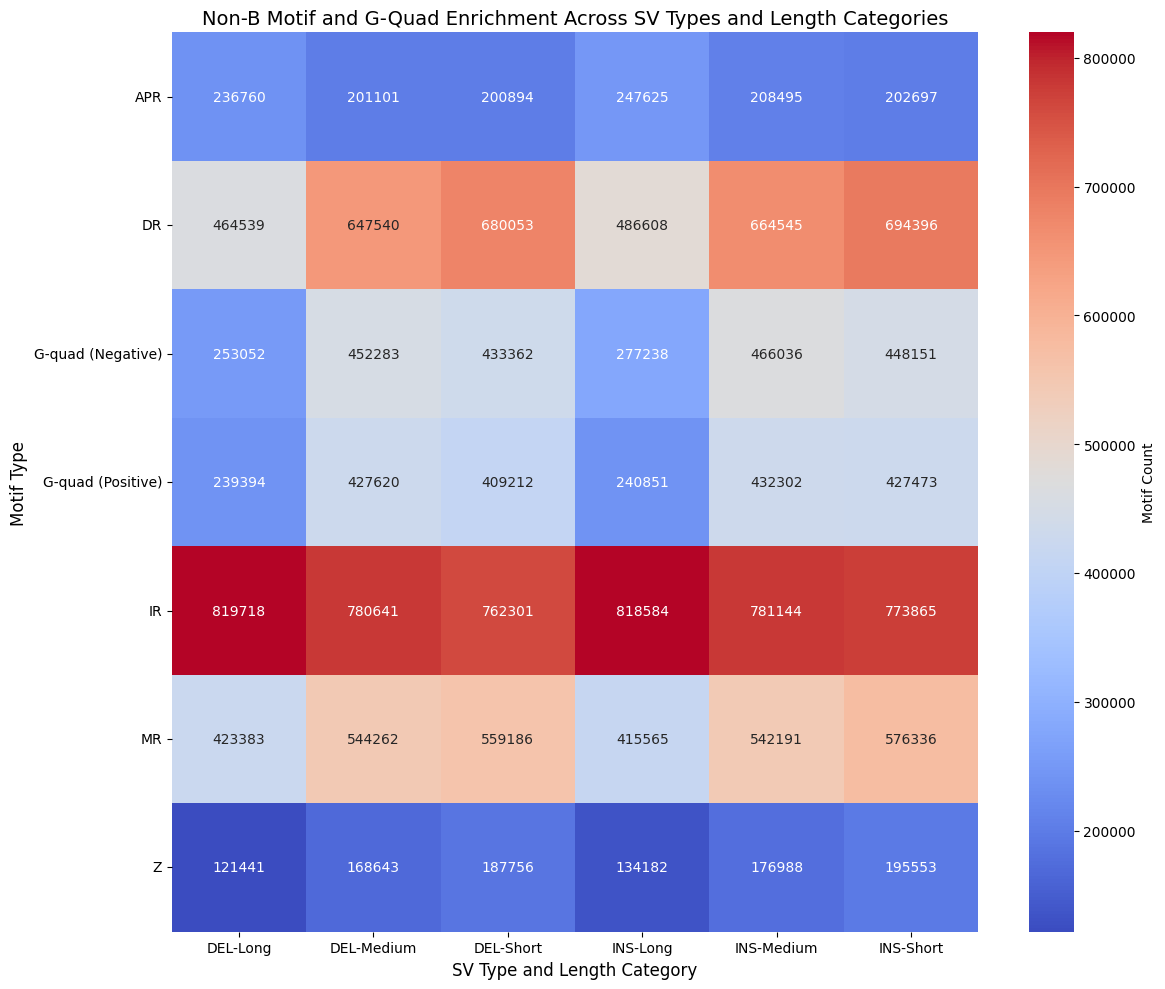

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===============================
# Load Non-B Motif Data
# ===============================
non_b_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv')

# Extract SV Length and SV Type
sv_info = non_b_df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
non_b_df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
non_b_df['SV_Type'] = sv_info[1]

# Filter out rows with missing values
non_b_df = non_b_df.dropna(subset=['SV_Length', 'SV_Type', 'Motif Type'])

# Calculate quantiles for Short, Medium, Long
q1 = non_b_df['SV_Length'].quantile(0.33)
q2 = non_b_df['SV_Length'].quantile(0.66)
q_upper = non_b_df['SV_Length'].quantile(0.95)  # Remove super large outliers

# Filter out rows above the 95th percentile
non_b_df = non_b_df[non_b_df['SV_Length'] <= q_upper]

# Define SV length categories based on quantiles
def classify_sv_length(length):
    if length <= q1:
        return 'Short'
    elif length <= q2:
        return 'Medium'
    else:
        return 'Long'

non_b_df['SV_Length_Category'] = non_b_df['SV_Length'].apply(classify_sv_length)

# ===============================
# Load G-Quadruplex Data
# ===============================
gquad_df = pd.read_csv('/home/alextu/scratch/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv')

# Extract SV Type (INS/DEL) and Length from 'Sample'
gquad_info = gquad_df['Sample'].str.extract(r'_(\d+)_(INS|DEL)')
gquad_df['SV_Length'] = pd.to_numeric(gquad_info[0], errors='coerce')
gquad_df['SV_Type'] = gquad_info[1]

# Extract STR (strand) and set Motif Type to 'G-quad'
gquad_df['Motif Type'] = 'G-quad'
gquad_df['Strand'] = gquad_df['STR'].replace({'+': 'Positive', '-': 'Negative'})

# Apply quantile-based SV length categories
gquad_df = gquad_df[gquad_df['SV_Length'] <= q_upper]  # Remove rows above 95th percentile
gquad_df['SV_Length_Category'] = gquad_df['SV_Length'].apply(classify_sv_length)

# Combine the 'Strand' column with Motif Type for separation
gquad_df['Motif Type'] = gquad_df['Motif Type'] + ' (' + gquad_df['Strand'] + ')'

# ===============================
# Combine Datasets
# ===============================
# Select relevant columns for heatmap
non_b_df_subset = non_b_df[['Motif Type', 'SV_Type', 'SV_Length_Category']]
gquad_df_subset = gquad_df[['Motif Type', 'SV_Type', 'SV_Length_Category']]

# Combine both dataframes
combined_df = pd.concat([non_b_df_subset, gquad_df_subset], ignore_index=True)

# ===============================
# Group Data and Create Heatmap
# ===============================
# Group by Motif Type, SV Type, and SV Length Category
grouped = combined_df.groupby(['Motif Type', 'SV_Type', 'SV_Length_Category']).size().reset_index(name='Count')

# Pivot the table to create the heatmap matrix
heatmap_data = grouped.pivot_table(
    index='Motif Type',
    columns=['SV_Type', 'SV_Length_Category'],
    values='Count',
    fill_value=0
)

# ===============================
# Plot the Heatmap
# ===============================
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f', cbar_kws={'label': 'Motif Count'})
plt.title('Non-B Motif and G-Quad Enrichment Across SV Types and Length Categories', fontsize=14)
plt.xlabel('SV Type and Length Category', fontsize=12)
plt.ylabel('Motif Type', fontsize=12)
plt.tight_layout()
plt.show()

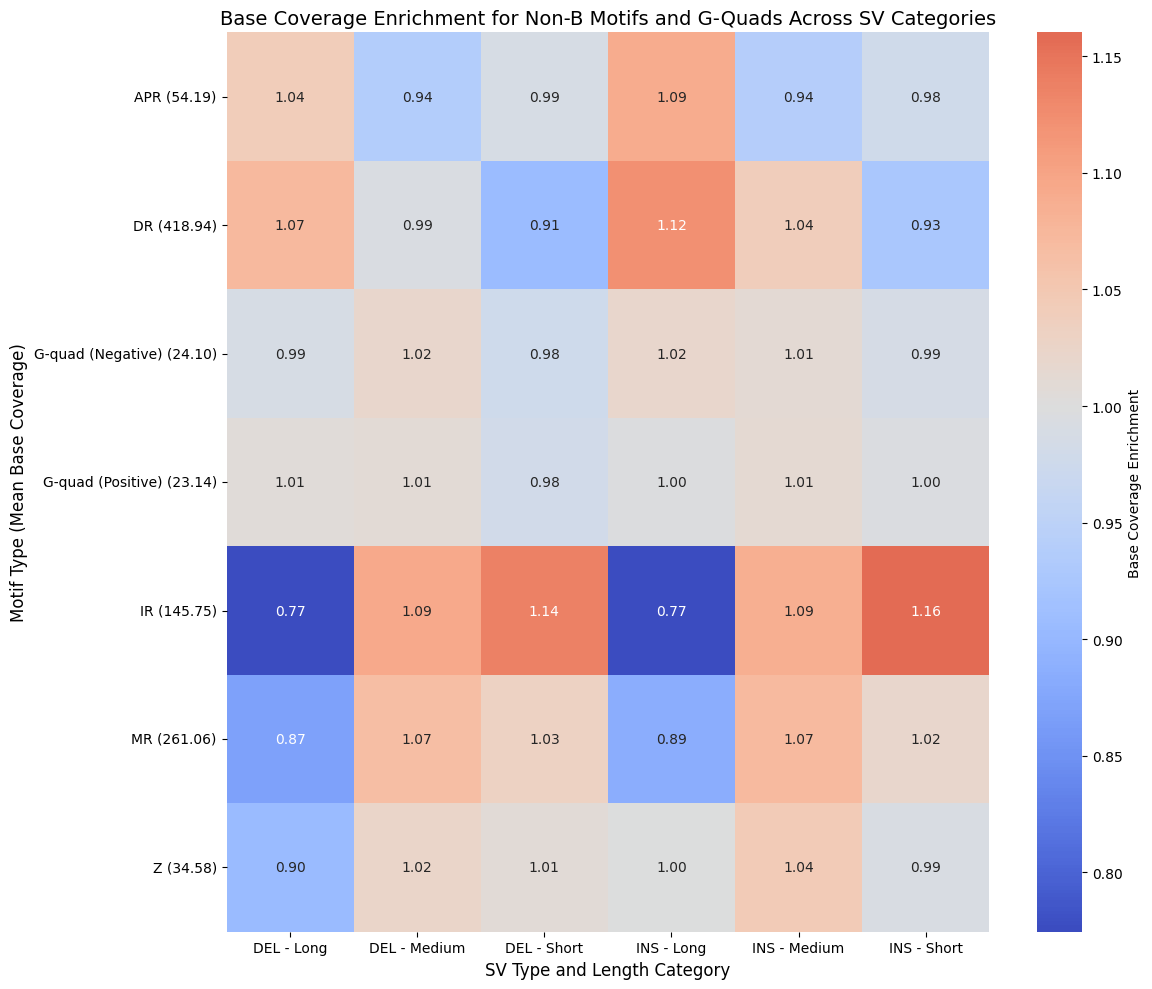

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================
# Load Non-B Motif Data
# ============================
non_b_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv')

# Extract SV Length and SV Type
sv_info = non_b_df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
non_b_df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
non_b_df['SV_Type'] = sv_info[1]

# Filter out rows with missing values
non_b_df = non_b_df.dropna(subset=['SV_Length', 'SV_Type', 'Total Bases Covered', 'Motif Type'])

# Calculate quantiles for SV length categories
q1 = non_b_df['SV_Length'].quantile(0.33)  # 33rd percentile
q2 = non_b_df['SV_Length'].quantile(0.66)  # 66th percentile
q_upper = non_b_df['SV_Length'].quantile(0.95)  # Remove super large outliers

# Filter out rows above the 95th percentile
non_b_df = non_b_df[non_b_df['SV_Length'] <= q_upper]

# Define SV length categories
def classify_sv_length(length):
    if length <= q1:
        return 'Short'
    elif length <= q2:
        return 'Medium'
    else:
        return 'Long'

non_b_df['SV_Length_Category'] = non_b_df['SV_Length'].apply(classify_sv_length)

# ============================
# Load and Process G-Quadruplex Data
# ============================
gquad_df = pd.read_csv('/home/alextu/scratch/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv')

# Extract SV Type and Length from 'Sample'
gquad_info = gquad_df['Sample'].str.extract(r'_(\d+)_(INS|DEL)')
gquad_df['SV_Length'] = pd.to_numeric(gquad_info[0], errors='coerce')
gquad_df['SV_Type'] = gquad_info[1]

# Define quantile-based SV length categories
gquad_df = gquad_df[gquad_df['SV_Length'] <= q_upper]  # Filter out rows above 95th percentile
gquad_df['SV_Length_Category'] = gquad_df['SV_Length'].apply(classify_sv_length)

# Add Motif Type (G-quad Positive/Negative)
gquad_df['Motif Type'] = gquad_df['STR'].replace({'+': 'G-quad (Positive)', '-': 'G-quad (Negative)'})

# Use Q column as a proxy for 'Total Bases Covered'
gquad_df['Total Bases Covered'] = gquad_df['Q']

# Filter out rows with missing values
gquad_df = gquad_df.dropna(subset=['SV_Length', 'SV_Type', 'Total Bases Covered', 'Motif Type'])

# ============================
# Combine Both Datasets
# ============================
# Select relevant columns
non_b_df_subset = non_b_df[['Motif Type', 'SV_Type', 'SV_Length_Category', 'Total Bases Covered']]
gquad_df_subset = gquad_df[['Motif Type', 'SV_Type', 'SV_Length_Category', 'Total Bases Covered']]

# Combine the two datasets
combined_df = pd.concat([non_b_df_subset, gquad_df_subset], ignore_index=True)

# ============================
# Calculate Enrichment
# ============================
# Calculate baseline coverage for each Motif Type
motif_baseline = combined_df.groupby('Motif Type')['Total Bases Covered'].mean().rename('Baseline_Coverage')
combined_df = combined_df.merge(motif_baseline, on='Motif Type', how='left')

# Calculate average base coverage for each category
grouped = combined_df.groupby(['Motif Type', 'SV_Type', 'SV_Length_Category']).agg(
    Category_Coverage=('Total Bases Covered', 'mean')
).reset_index()

# Merge baseline coverage
grouped = grouped.merge(motif_baseline, on='Motif Type')

# Calculate enrichment as Category Coverage / Baseline Coverage
grouped['Enrichment'] = grouped['Category_Coverage'] / grouped['Baseline_Coverage']

# Combine SV Type and Length Category for heatmap
grouped['SV_Category'] = grouped['SV_Type'] + ' - ' + grouped['SV_Length_Category']

# Pivot the table for heatmap
heatmap_data = grouped.pivot_table(
    index='Motif Type',
    columns='SV_Category',
    values='Enrichment',
    fill_value=1
)

# ============================
# Update Motif Type Labels with Mean Base Coverage
# ============================
# Add the mean base coverage in parentheses to the motif type labels
updated_index = [f"{motif} ({motif_baseline[motif]:.2f})" for motif in heatmap_data.index]
heatmap_data.index = updated_index

# ============================
# Plot the Enrichment Heatmap
# ============================
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=1, fmt='.2f',
            cbar_kws={'label': 'Base Coverage Enrichment'})

# Titles and labels
plt.title('Base Coverage Enrichment for Non-B Motifs and G-Quads Across SV Categories', fontsize=14)
plt.xlabel('SV Type and Length Category', fontsize=12)
plt.ylabel('Motif Type (Mean Base Coverage)', fontsize=12)

plt.tight_layout()
plt.show()

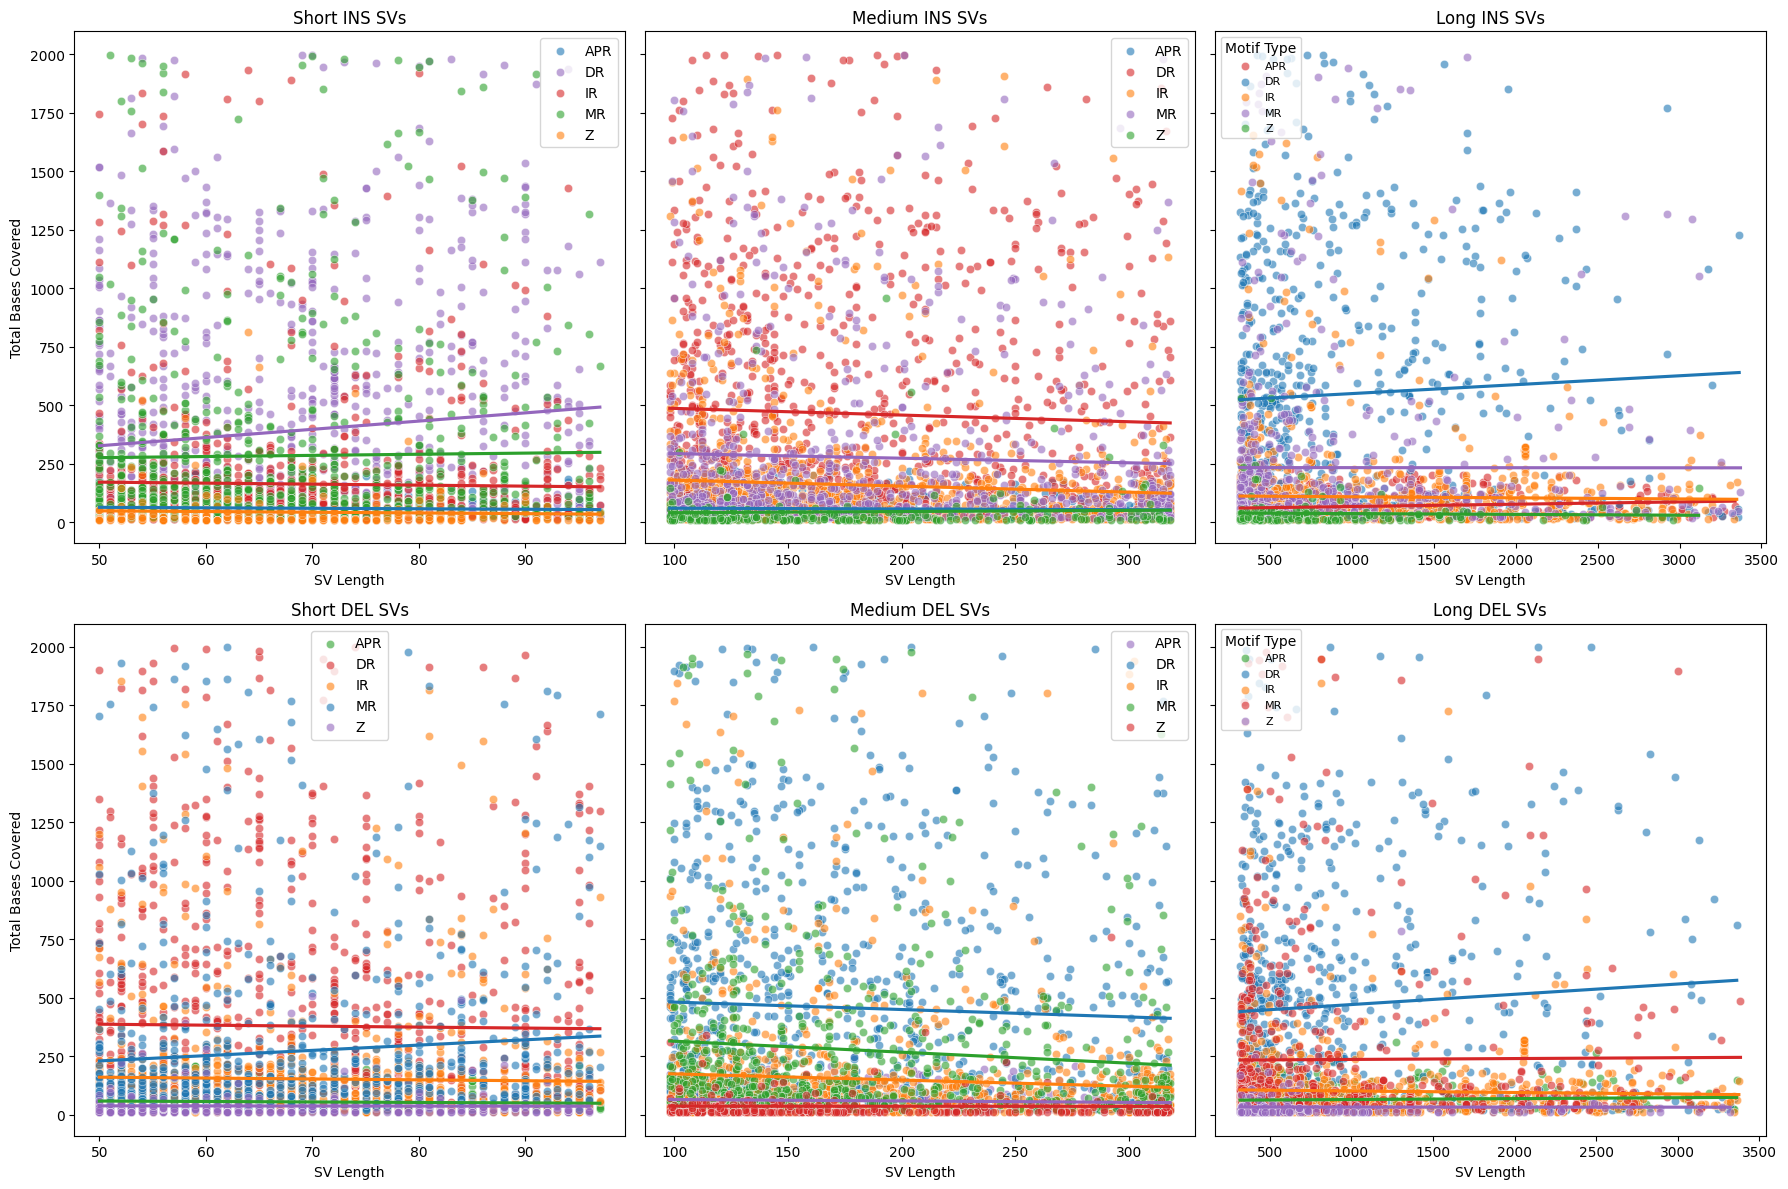

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================
# 1) Load and Filter the Data
# =============================
file_path = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv"
df = pd.read_csv(file_path)

# Extract SV Length and SV Type
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Filter for rows with SV_Length and a single haplotype
df = df.dropna(subset=['SV_Length', 'Total Bases Covered', 'SV_Type'])
df = df[df['Sample_Haplotype_Chromosome'].str.contains("HG00513_hap1")]

# =============================
# 2) Define Quantile Categories
# =============================
q1 = df['SV_Length'].quantile(0.33)  # 33rd percentile
q2 = df['SV_Length'].quantile(0.66)  # 66th percentile
q_upper = df['SV_Length'].quantile(0.95)  # 95th percentile

# Filter out outliers above the 95th percentile
df = df[df['SV_Length'] <= q_upper]

# Categorize SV Length into Short, Medium, Long
def categorize_length(length):
    if length <= q1:
        return 'Short'
    elif length <= q2:
        return 'Medium'
    else:
        return 'Long'

df['SV_Category'] = df['SV_Length'].apply(categorize_length)

# =============================
# 3) Random Sampling (20% of data)
# =============================
df_sampled = df.sample(frac=0.2, random_state=42)  # Randomly sample 20% of the data

# =============================
# 4) Separate Plots for Each SV Category and Type
# =============================
categories = ['Short', 'Medium', 'Long']
sv_types = ['INS', 'DEL']
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

for row, sv_type in enumerate(sv_types):
    for col, category in enumerate(categories):
        ax = axes[row, col]
        # Filter data for this category and type
        category_data = df_sampled[(df_sampled['SV_Category'] == category) & (df_sampled['SV_Type'] == sv_type)]
        
        # Set up a color palette for Motif Types
        unique_motifs = category_data['Motif Type'].unique()
        palette = sns.color_palette("tab10", len(unique_motifs))
        motif_colors = {motif: palette[i] for i, motif in enumerate(unique_motifs)}
        
        # Scatterplot with regression line per motif
        for motif, motif_data in category_data.groupby('Motif Type'):
            sns.scatterplot(
                x='SV_Length',
                y='Total Bases Covered',
                data=motif_data,
                color=motif_colors[motif],
                label=motif,
                alpha=0.6,
                ax=ax
            )
            sns.regplot(
                x='SV_Length',
                y='Total Bases Covered',
                data=motif_data,
                scatter=False,
                color=motif_colors[motif],
                ci=None,
                label=None,
                ax=ax  # Add regression line to the same axis
            )
        
        # Finalize each subplot
        ax.set_title(f"{category} {sv_type} SVs")
        ax.set_xlabel("SV Length")
        ax.set_ylabel("Total Bases Covered")
        if col == 2:  # Add legend only in the last column of each row
            ax.legend(title="Motif Type", loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

Short INS | Motif: APR | Correlation: 0.57
Short INS | Motif: DR | Correlation: 0.70
Short INS | Motif: IR | Correlation: -0.53
Short INS | Motif: MR | Correlation: 0.25
Short INS | Motif: Z | Correlation: 0.63
Short DEL | Motif: APR | Correlation: 0.50
Short DEL | Motif: DR | Correlation: 0.67
Short DEL | Motif: IR | Correlation: -0.53
Short DEL | Motif: MR | Correlation: 0.13
Short DEL | Motif: Z | Correlation: -0.36
Medium INS | Motif: APR | Correlation: 0.65
Medium INS | Motif: DR | Correlation: 0.24
Medium INS | Motif: IR | Correlation: 0.20
Medium INS | Motif: MR | Correlation: -0.67
Medium INS | Motif: Z | Correlation: 0.35
Medium DEL | Motif: APR | Correlation: 0.80
Medium DEL | Motif: DR | Correlation: 0.48
Medium DEL | Motif: IR | Correlation: 0.25
Medium DEL | Motif: MR | Correlation: -0.48
Medium DEL | Motif: Z | Correlation: -0.19
Long INS | Motif: APR | Correlation: 0.22
Long INS | Motif: DR | Correlation: 0.43
Long INS | Motif: IR | Correlation: -0.32
Long INS | Motif: M

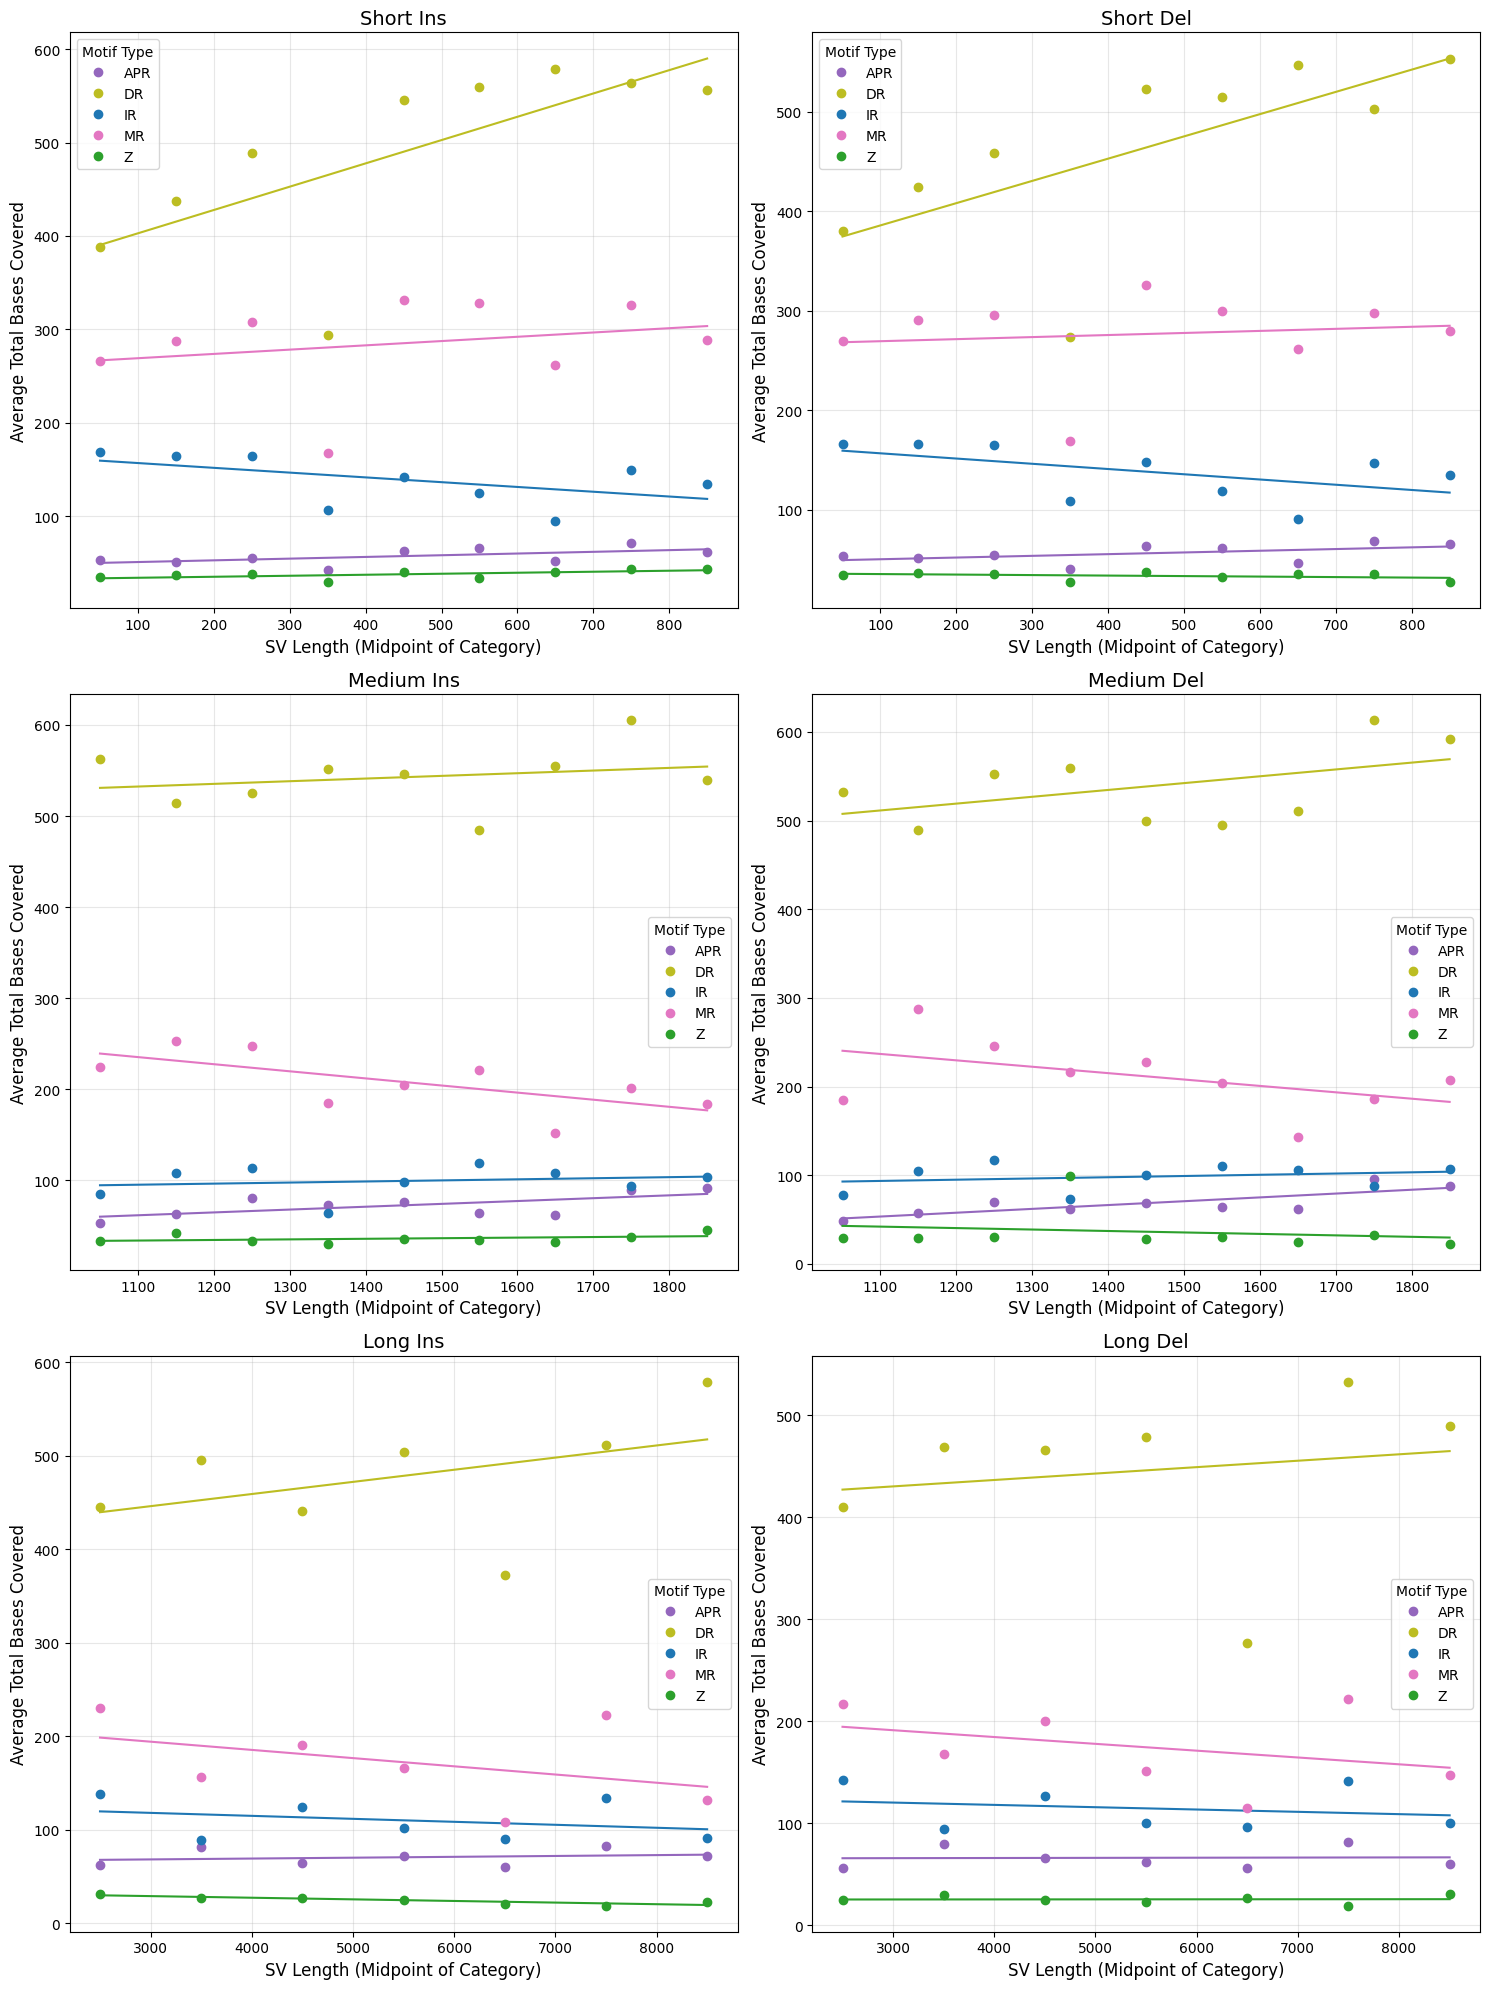

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv')

# Use vectorized string operations to extract SV Length and SV Type
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Filter out rows with missing SV length, type, or 'Total Bases Covered' less than 1 or greater than 2000
df = df.dropna(subset=['SV_Length', 'SV_Type'])
df = df[(df['Total Bases Covered'] >= 1) & (df['Total Bases Covered'] <= 2000)]

# Define bins for short, medium, and long SVs
bins_short = np.arange(0, 1000, 100)
bins_medium = np.arange(1000, 2000, 100)
bins_long = np.arange(2000, 10000, 1000)

# Generate a consistent color palette for motifs
unique_motifs = df['Motif Type'].unique()
color_map = colormaps['tab10']
motif_colors = {motif: color_map(i / len(unique_motifs)) for i, motif in enumerate(unique_motifs)}

# Function to create scatter plot and regression line for given data and bins
def plot_sv_length_vs_base_coverage(ax, data, bins, sv_category, sv_type):
    for motif, motif_data in data.groupby('Motif Type'):
        # Bin the data
        motif_data['SV_Length_Category'] = pd.cut(motif_data['SV_Length'], bins=bins, right=False)
        avg_base_coverage = motif_data.groupby('SV_Length_Category', observed=True)['Total Bases Covered'].mean().reset_index()

        # Calculate bin midpoints
        bin_intervals = avg_base_coverage['SV_Length_Category'].cat.categories
        bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_intervals]
        avg_base_coverage['SV_Length_Midpoint'] = bin_midpoints[:len(avg_base_coverage)]

        # Plot the data
        color = motif_colors[motif]
        ax.plot(avg_base_coverage['SV_Length_Midpoint'], avg_base_coverage['Total Bases Covered'], label=motif, marker='o', linestyle='', color=color)

        # Calculate regression line and correlation
        if len(avg_base_coverage.dropna()) > 1:
            m, b = np.polyfit(avg_base_coverage['SV_Length_Midpoint'], avg_base_coverage['Total Bases Covered'], 1)
            ax.plot(avg_base_coverage['SV_Length_Midpoint'], m * np.array(avg_base_coverage['SV_Length_Midpoint']) + b, color=color)
            corr = np.corrcoef(avg_base_coverage['SV_Length_Midpoint'], avg_base_coverage['Total Bases Covered'])[0, 1]
            print(f"{sv_category} {sv_type} | Motif: {motif} | Correlation: {corr:.2f}")

    # Add title and labels
    ax.set_title(f'{sv_category.capitalize()} {sv_type.capitalize()}', fontsize=14)
    ax.set_xlabel('SV Length (Midpoint of Category)', fontsize=12)
    ax.set_ylabel('Average Total Bases Covered', fontsize=12)
    ax.legend(title='Motif Type', fontsize=10)
    ax.grid(visible=True, alpha=0.3)

# Create a figure with 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Filter data for each category and plot
categories = [
    ('Short', 'INS', bins_short),
    ('Short', 'DEL', bins_short),
    ('Medium', 'INS', bins_medium),
    ('Medium', 'DEL', bins_medium),
    ('Long', 'INS', bins_long),
    ('Long', 'DEL', bins_long),
]

for ax, (sv_category, sv_type, bins) in zip(axes, categories):
    category_data = df[df['SV_Type'] == sv_type]
    if sv_category == 'Short':
        category_data = category_data[category_data['SV_Length'] < 1000]
    elif sv_category == 'Medium':
        category_data = category_data[(category_data['SV_Length'] >= 1000) & (category_data['SV_Length'] < 2000)]
    elif sv_category == 'Long':
        category_data = category_data[category_data['SV_Length'] >= 2000]

    plot_sv_length_vs_base_coverage(ax, category_data, bins, sv_category, sv_type)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Short MEIs | TE Designation: LINE/L1 | Correlation: 0.24
Short MEIs | TE Designation: Retroposon/SVA | Correlation: 0.75
Short MEIs | TE Designation: SINE/Alu | Correlation: -0.40
Medium MEIs | TE Designation: LINE/L1 | Correlation: 0.27
Medium MEIs | TE Designation: Retroposon/SVA | Correlation: -0.12
Long MEIs | TE Designation: LINE/L1 | Correlation: 0.48
Long MEIs | TE Designation: Retroposon/SVA | Correlation: 0.91


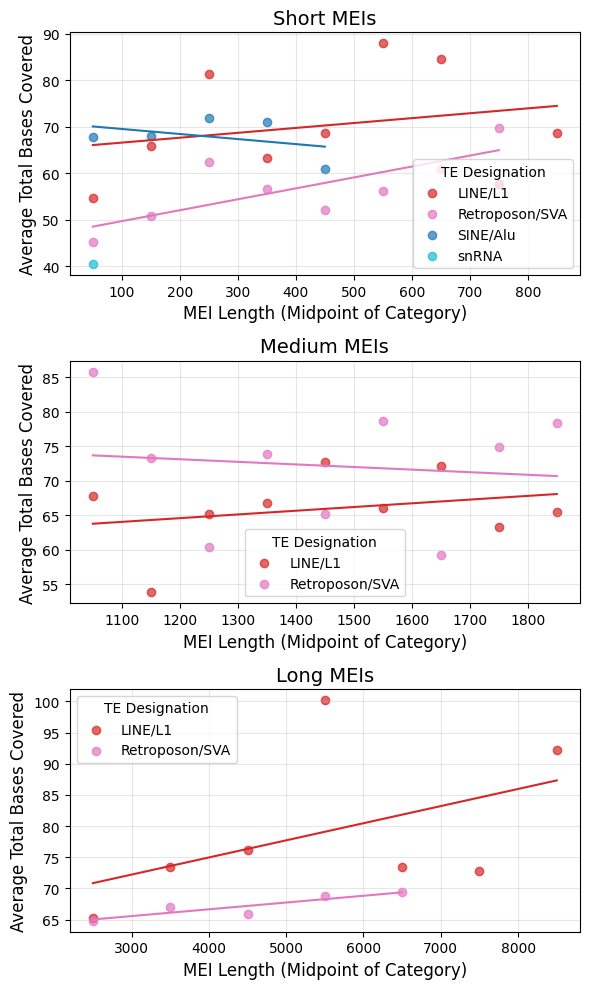

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your MEI data into a pandas DataFrame
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/MEIflanks_collapsed_summary_metrics_chr_with_TE_designations.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Extract MEI Length and MEI Type (INS/DEL) from 'Sample_Haplotype_Chromosome' using regex
mei_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['MEI_Length'] = pd.to_numeric(mei_info[0], errors='coerce')
df['MEI_Type'] = mei_info[1]

# Filter out rows with missing MEI length or 'Total Bases Covered'
df = df.dropna(subset=['MEI_Length', 'Total Bases Covered'])

# Define bins for short, medium, and long MEIs
bins_short = np.arange(0, 1000, 100)
bins_medium = np.arange(1000, 2000, 100)
bins_long = np.arange(2000, 10000, 1000)

# Generate a consistent color palette for te_designations
unique_te_designations = df['te_designation'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_te_designations)))
te_colors = {te: colors[i] for i, te in enumerate(unique_te_designations)}

# Function to create scatter plot for each MEI category
def plot_mei_length_vs_base_coverage(ax, data, bins, title):
    for te_designation, te_data in data.groupby('te_designation'):
        te_data['MEI_Length_Category'] = pd.cut(te_data['MEI_Length'], bins=bins, right=False)
        
        # Compute average total base coverage for each bin
        avg_base_coverage = te_data.groupby('MEI_Length_Category', observed=True)['Total Bases Covered'].mean().reset_index()

        # Calculate bin midpoints
        bin_intervals = avg_base_coverage['MEI_Length_Category'].cat.categories
        bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_intervals]
        avg_base_coverage['MEI_Length_Midpoint'] = bin_midpoints[:len(avg_base_coverage)]

        # Scatter plot the data
        color = te_colors[te_designation]
        ax.scatter(
            avg_base_coverage['MEI_Length_Midpoint'],
            avg_base_coverage['Total Bases Covered'],
            label=te_designation,
            color=color,
            alpha=0.7,
        )

        # Calculate and display regression line and correlation
        if len(avg_base_coverage.dropna()) > 1:
            m, b = np.polyfit(
                avg_base_coverage['MEI_Length_Midpoint'],
                avg_base_coverage['Total Bases Covered'],
                1,
            )
            ax.plot(
                avg_base_coverage['MEI_Length_Midpoint'],
                m * np.array(avg_base_coverage['MEI_Length_Midpoint']) + b,
                color=color,
            )
            corr = np.corrcoef(
                avg_base_coverage['MEI_Length_Midpoint'],
                avg_base_coverage['Total Bases Covered'],
            )[0, 1]
            print(f"{title} | TE Designation: {te_designation} | Correlation: {corr:.2f}")

    # Set labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('MEI Length (Midpoint of Category)', fontsize=12)
    ax.set_ylabel('Average Total Bases Covered', fontsize=12)
    ax.legend(title='TE Designation', fontsize=10)
    ax.grid(visible=True, alpha=0.3)

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Filter data and plot for each category
plot_mei_length_vs_base_coverage(
    axes[0], df[df['MEI_Length'] < 1000], bins_short, 'Short MEIs'
)
plot_mei_length_vs_base_coverage(
    axes[1],
    df[(df['MEI_Length'] >= 1000) & (df['MEI_Length'] < 2000)],
    bins_medium,
    'Medium MEIs',
)
plot_mei_length_vs_base_coverage(
    axes[2], df[df['MEI_Length'] >= 2000], bins_long, 'Long MEIs'
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

# ==========================
# 1. Load the CSV Data for a Single Motif
# ==========================

# Define the path to your CSV file containing a single motif type
MOTIF_FILE_PATH = '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/DR_motifs.csv'  # Replace with actual path

try:
    df_motifs = pd.read_csv(MOTIF_FILE_PATH)
    print(f"Successfully loaded data from '{MOTIF_FILE_PATH}'.")
except FileNotFoundError:
    print(f"Error: The file '{MOTIF_FILE_PATH}' was not found.")
    sys.exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: The file '{MOTIF_FILE_PATH}' is empty.")
    sys.exit(1)
except pd.errors.ParserError:
    print(f"Error: The file '{MOTIF_FILE_PATH}' does not appear to be in CSV format or is malformed.")
    sys.exit(1)

# ==========================
# 2. Define Processing Function
# ==========================

def process_sv_motifs(df, sv_type):
    """
    Process the DataFrame for a specific SV type (INS or DEL).
    
    Parameters:
        df (pd.DataFrame): The original DataFrame containing all SVs.
        sv_type (str): The SV type to process ('INS' or 'DEL').
    
    Returns:
        pd.DataFrame: Combined DataFrame for hap1 and hap2.
    """
    print(f"\nProcessing {sv_type} SVs...")
    
    sv_pattern = f'_{sv_type}'
    df_sv = df[df['Sample_Haplotype_Chromosome'].str.contains(sv_pattern, regex=True)].copy()
    
    if df_sv.empty:
        print(f"No {sv_type} SVs found. Skipping.")
        return None
    
    print(f"Number of rows for {sv_type} SVs: {len(df_sv)}")
    unique_sv_identifiers = df_sv['Sample_Haplotype_Chromosome'].unique()
    print(f"Unique {sv_type} SV identifiers found: {len(unique_sv_identifiers)}")
    
    def extract_hap_flank(sample):
        pattern = r'hap(\d+)\|.*\|.*\|(pre|post)_flank$'  # Correct regex for parsing
        match = re.search(pattern, sample)
        if match:
            hap = f"hap{match.group(1)}"
            flank = match.group(2)
            return hap, flank
        return None, None
    
    df_sv[['hap', 'flank']] = df_sv['Sample_Haplotype_Chromosome'].apply(
        lambda x: pd.Series(extract_hap_flank(x))
    )
    
    initial_count = len(df_sv)
    df_sv.dropna(subset=['hap', 'flank'], inplace=True)
    dropped_count = initial_count - len(df_sv)
    if dropped_count > 0:
        print(f"Dropped {dropped_count} rows due to extraction issues.")
    
    print(f"Rows after haplotype and flank extraction: {len(df_sv)}")
    
    def calculate_rel_pos(row):
        if row['flank'] == 'pre':
            return row['Start'] - 2000
        elif row['flank'] == 'post':
            return row['Start']
        else:
            return None
    
    df_sv['rel_pos'] = df_sv.apply(calculate_rel_pos, axis=1)
    initial_count = len(df_sv)
    df_sv.dropna(subset=['rel_pos'], inplace=True)
    dropped_count = initial_count - len(df_sv)
    if dropped_count > 0:
        print(f"Dropped {dropped_count} rows due to rel_pos calculation issues.")
    
    def validate_rel_pos(row):
        if row['flank'] == 'pre':
            return -2000 <= row['rel_pos'] <= 0
        elif row['flank'] == 'post':
            return 0 <= row['rel_pos'] <= 2000
        else:
            return False
    
    valid_mask = df_sv.apply(validate_rel_pos, axis=1)
    invalid_rel_pos = df_sv[~valid_mask]
    if not invalid_rel_pos.empty:
        print(f"Warning: {len(invalid_rel_pos)} inconsistent rel_pos values.")
        print(invalid_rel_pos[['Sample_Haplotype_Chromosome', 'rel_pos', 'flank']].head())
        df_sv = df_sv[valid_mask]
    
    print(f"Rows after rel_pos validation: {len(df_sv)}")
    
    df_hap1 = df_sv[df_sv['hap'] == 'hap1']
    df_hap2 = df_sv[df_sv['hap'] == 'hap2']
    
    print(f"Number of motifs for hap1: {len(df_hap1)}")
    print(f"Number of motifs for hap2: {len(df_hap2)}")
    
    num_sv_hap1 = df_hap1['Sample_Haplotype_Chromosome'].nunique()
    num_sv_hap2 = df_hap2['Sample_Haplotype_Chromosome'].nunique()
    print(f"Unique {sv_type} SVs for hap1: {num_sv_hap1}")
    print(f"Unique {sv_type} SVs for hap2: {num_sv_hap2}")
    
    df_combined = pd.concat([df_hap1.assign(haplotype='hap1'), df_hap2.assign(haplotype='hap2')])
    
    return df_combined

# ==========================
# 3. Process Insertion (INS) SVs
# ==========================

df_ins = process_sv_motifs(df_motifs, 'INS')

# ==========================
# 4. Process Deletion (DEL) SVs
# ==========================

df_del = process_sv_motifs(df_motifs, 'DEL')

# ==========================
# 5. Visualize and Save the Density of Motif Types for INS and DEL
# ==========================

sns.set(style="whitegrid")

def plot_density_single_motif(df, sv_type, save_path):
    if df is not None:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x='rel_pos', hue='haplotype', fill=True, common_norm=False, alpha=0.5)
        plt.axvline(0, color='black', linestyle='--', linewidth=1)
        plt.title(f"{sv_type} SVs: Density of Motif Relative to SV Breakpoints", fontsize=16)
        plt.xlabel('Position Relative to SV Breakpoint (bp)', fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.xlim(-2000, 2000)
        plt.legend(title='Haplotype')
        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
    else:
        print(f"No data to plot for {sv_type} SVs.")

# Save plot for INS
plot_density_single_motif(df_ins, 'INS', '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/DR_INS_density_plot.pdf')

# Save plot for DEL
plot_density_single_motif(df_del, 'DEL', '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/DR_DEL_density_plot.pdf')

print("Plots saved successfully.")

Successfully loaded data from '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/DR_motifs.csv'.

Processing INS SVs...
Number of rows for INS SVs: 10786576
Unique INS SV identifiers found: 1931807


In [2]:
import re

# ==========================
# Sample Data for Testing
# ==========================

# SV Data Samples
sv_samples = [
    "flanking_sequences_HG00513_hap1|chr10:1005248-1007247|chr10_1007247_78_INS|pre_flank" # Additional haplotype
]

# G4 Data Samples
g4_samples = [
    "flanking_sequences_HG00733_hap2_chr10_1006437-1008457_chr10_1008457_59_INS_pre_flank.txt" # Additional haplotype
]

# ==========================
# Define Correct Regex Patterns
# ==========================

# SV Data Regex Pattern
sv_pattern = re.compile(r'hap(\d+)\|.*_(INS|DEL)\|(pre|post)_flank')

# G4 Data Regex Pattern
g4_pattern = re.compile(r'hap(\d+)_.*_(INS|DEL)_(pre|post)_flank\.txt$')

# ==========================
# Function to Test Regex Patterns
# ==========================

def test_regex(pattern, samples, data_type):
    print(f"\nTesting {data_type} Regex Pattern:")
    for sample in samples:
        match = pattern.search(sample)
        if match:
            haplotype_num = match.group(1)
            sv_type = match.group(2)
            flank = match.group(3)
            print(f"Sample: {sample}")
            print(f"  Haplotype: hap{haplotype_num}, SV Type: {sv_type}, Flank: {flank}\n")
        else:
            print(f"Sample: {sample}")
            print("  No match found.\n")

# ==========================
# Run Tests
# ==========================

test_regex(sv_pattern, sv_samples, "SV")
test_regex(g4_pattern, g4_samples, "G4")


Testing SV Regex Pattern:
Sample: flanking_sequences_HG00513_hap1|chr10:1005248-1007247|chr10_1007247_78_INS|pre_flank
  Haplotype: hap1, SV Type: INS, Flank: pre


Testing G4 Regex Pattern:
Sample: flanking_sequences_HG00733_hap2_chr10_1006437-1008457_chr10_1008457_59_INS_pre_flank.txt
  Haplotype: hap2, SV Type: INS, Flank: pre

